In [1]:
import pandas as pd
from benchmarking.evaluation import Evaluation

In [3]:
cache = pd.read_csv('data/benchmark_cache.csv')
Evaluation.build_paper_table(cache,"data/benchmark_test.csv")

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,HumanAssessmentRelatednessCont,HumanAssessmentSimilarityCont,HumanAssessmentMayoSRS,Causality,May-(Treat/Prevent),SemanticType,Association,ConceptualSimilarityChoi
0,GGPONC,multi-term,word2vec,4081,83160,0.049074,0.037825,"(0.022268492094199017, 0.12413793103448276)","(-0.014039929160590964, 0.13416815742397137)","(0.10901931240047699, 0.22772277227722773)","(0.16083916083916083, 0.00023836790531612249)","(0.02512562814070352, 0.0024283632831471587)","(0.07853478219304674, 0.01244643538029933)","(0.07403906742281033, 0.004150916734376656)",0.5218801196687762
1,GGPONC,multi-term,fastText,4081,83160,0.049074,0.037825,"(0.046284216722787, 1.0)","(0.0700125079441386, 1.0)","(0.05165032431173652, 1.0)","(0.36013986013986016, 0.000533736831468709)","(0.05695142378559464, 0.005504290108466894)","(0.08820092837491901, 0.013978356148010481)","(0.0573408947700063, 0.003214752534708729)",1.0702780677474129
2,GGPONC,multi-term,GloVe,4045,83025,0.048720,0.037491,"(0.04810054896573479, 0.11896551724137931)","(0.1915411886773956, 0.12880143112701253)","(-0.1744556751977294, 0.21782178217821782)","(0.029850746268656716, 2.888128348423804e-05)","(0.08193979933110368, 0.007932653391614052)","(0.04848156821555461, 0.007625725000189653)","(0.0437308868501529, 0.0035424098295679745)",0.1445112785265157
3,GGPONC,single-term,word2vec,3172,117322,0.027037,0.029400,"(0.05843366661492191, 0.09827586206896552)","(0.10071523950165606, 0.10912343470483005)","(-0.09418692763284164, 0.15841584158415842)","(0.06711409395973154, 5.181910985133097e-05)","(0.0430622009569378, 0.0029140359397765905)","(0.08567996424181473, 0.008308283270832337)","(0.06111645813282002, 0.0022432613841099373)",0.34190019264995675
4,GGPONC,single-term,fastText,3172,117322,0.027037,0.029400,"(0.054535276298323734, 1.0)","(0.07806380301600986, 1.0)","(-0.004133899667167666, 1.0)","(0.18120805369127516, 0.00013991159659859363)","(0.0861244019138756, 0.005828071879553181)","(0.09414459716169404, 0.009129088562994775)","(0.05678537054860443, 0.0020842901049210444)",0.8964836875186869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,News 100K,SE CUI,Flair,6292,161331,0.039001,0.058318,"(0.23157894736842105, 0.034482758620689655)","(0.09769230769230769, 0.044722719141323794)","(-0.5857791861290061, 0.0891089108910891)","(0.12131715771230503, 0.0003627337689593168)","(0.0, 0.0)","(0.08087331054245048, 0.020524395352014772)","(0.057971014492753624, 0.001554385840958067)",1.6610989254510298
73,News 100K,SE CUI NF,Flair,6292,161331,0.039001,0.058318,"(0.4781954887218045, 0.034482758620689655)","(0.5407692307692308, 0.044722719141323794)","(-0.2008385781013735, 0.0891089108910891)","(0.4194107452339688, 0.0012540224584022097)","(0.08695652173913043, 0.00032378177108628785)","(0.13473001041476662, 0.034192392780585563)","(0.07444005270092227, 0.0019959727275938813)",2.636681181009245
74,News 100K,JCoRe,Flair,3087,189671,0.016276,0.028612,"(-0.2692307692307692, 0.04310344827586207)","(0.1442687747035573, 0.04114490161001789)","(-0.4, 0.039603960396039604)","(0.1450381679389313, 0.0001969126174350577)","(0.06451612903225806, 0.00032378177108628785)","(0.07501990672278466, 0.001295494546940315)","(0.07763975155279502, 0.0008831737732716289)",0.19898209578069928
75,News 100K,multi-term,Flair,0,155039,0.000000,0.000000,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0.0


In [4]:
import pandas as pd
df = pd.read_csv("data/benchmark_test.csv")
df
from ast import literal_eval
# tuple_benchmarks = ["CausalityBeam", "NDFRTBeam", "SemanticTypeBeam", "AssociationBeam"]
tuple_benchmarks = ["HumanAssessmentRelatednessCont", "HumanAssessmentSimilarityCont", "HumanAssessmentMayoSRS", "Causality", "May-(Treat/Prevent)", "SemanticType", "Association"]
for tuple_benchmark in tuple_benchmarks:
    df[tuple_benchmark] = [literal_eval(x) for x in df[tuple_benchmark]]
    if "HumanAssessment" in tuple_benchmark:
        df[[f'{tuple_benchmark} (score)', f'{tuple_benchmark} (coverage)']] = pd.DataFrame(df[tuple_benchmark].values.tolist(), index=df.index)
    else:
        df[[f'{tuple_benchmark} (relaxed)', f'{tuple_benchmark} (strict)']] = pd.DataFrame(df[tuple_benchmark].values.tolist(), index=df.index)
df = df.drop(columns=tuple_benchmarks)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatednessCont (score),HumanAssessmentRelatednessCont (coverage),HumanAssessmentSimilarityCont (score),HumanAssessmentSimilarityCont (coverage),HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
0,GGPONC,multi-term,word2vec,4081,83160,0.049074,0.037825,0.521880,0.022268,0.124138,-0.014040,0.134168,0.109019,0.227723,0.160839,0.000238,0.025126,0.002428,0.078535,0.012446,0.074039,0.004151
1,GGPONC,multi-term,fastText,4081,83160,0.049074,0.037825,1.070278,0.046284,1.000000,0.070013,1.000000,0.051650,1.000000,0.360140,0.000534,0.056951,0.005504,0.088201,0.013978,0.057341,0.003215
2,GGPONC,multi-term,GloVe,4045,83025,0.048720,0.037491,0.144511,0.048101,0.118966,0.191541,0.128801,-0.174456,0.217822,0.029851,0.000029,0.081940,0.007933,0.048482,0.007626,0.043731,0.003542
3,GGPONC,single-term,word2vec,3172,117322,0.027037,0.029400,0.341900,0.058434,0.098276,0.100715,0.109123,-0.094187,0.158416,0.067114,0.000052,0.043062,0.002914,0.085680,0.008308,0.061116,0.002243
4,GGPONC,single-term,fastText,3172,117322,0.027037,0.029400,0.896484,0.054535,1.000000,0.078064,1.000000,-0.004134,1.000000,0.181208,0.000140,0.086124,0.005828,0.094145,0.009129,0.056785,0.002084
5,GGPONC,single-term,GloVe,3172,117322,0.027037,0.029400,0.099176,0.141790,0.098276,0.166766,0.109123,-0.513613,0.158416,0.068966,0.000029,0.078947,0.005342,0.066730,0.006471,0.044401,0.002229
6,GGPONC,SE CUI,word2vec,12612,93879,0.134343,0.116895,3.218167,0.185502,0.141379,0.133599,0.157424,0.165343,0.346535,0.092033,0.000694,0.081243,0.011009,0.119662,0.094690,0.065189,0.007949
7,GGPONC,SE CUI,fastText,12612,93879,0.134343,0.116895,3.427386,0.020529,1.000000,0.040436,1.000000,-0.148651,1.000000,0.197802,0.001492,0.054958,0.007447,0.139631,0.110492,0.053165,0.006482
8,GGPONC,SE CUI,GloVe,12612,93879,0.134343,0.116895,0.003291,-0.150691,0.036207,-0.121615,0.041145,-0.348227,0.128713,0.381868,0.002881,0.037037,0.005019,0.105091,0.083160,0.294944,0.035963
9,GGPONC,JCoRe,word2vec,4342,83155,0.052216,0.040244,0.513450,0.082455,0.168966,0.067311,0.191413,0.242549,0.217822,0.161290,0.000285,0.040788,0.004695,0.089385,0.017421,0.061351,0.003833


# Tables

In [5]:
# avg tables
from scipy.stats import ttest_ind



def test_and_mean(df_1, df_2, benchmark):
    t, p = ttest_ind(df_1[benchmark], df_2[benchmark], equal_var=False)
    mean_1 = df_1[benchmark].mean()
    mean_2 = df_2[benchmark].mean()
    std_1 = df_1[benchmark].std()
    std_2 = df_2[benchmark].std()
    
    return f'{p:.4f}', f'{mean_1:.4f} [{std_1:.4f}]', f'{mean_2:.4f} [{std_2:.4f}]'

# def statistic_table_algorithms(df):
#     df_pf = df.loc[df['Algorithm'].isin(["word2vec", "GloVe", "fastText"])]
#     df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "SE CUI", "single-term", "multi-term"])]
#     df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]
#     df_wv = df_pf.loc[df_pf['Algorithm'].isin(["word2vec"])]
#     df_g = df_pf.loc[df_pf['Algorithm'].isin(["GloVe"])]
#     df_ft = df_pf.loc[df_pf['Algorithm'].isin(["fastText"])]
# #     df_jsyncc = df_pf.loc[df_pf['Algorithm'].isin(["JSynCC"])]
# #     df_news = df_pf.loc[df_pf['Data set'].isin(["News 100K"])]
    
#     benchmarks = ["HumanAssessmentRelatedness (score)",
#                   "HumanAssessmentRelatednessCont (score)",
#                   "HumanAssessmentSimilarityCont (score)",
#                   "HumanAssessmentMayoSRS (score)",
# #                   "Causality (relaxed)", 
#                   "Causality (strict)", 
# #                   "May-(Treat/Prevent) (relaxed)", 
#                   "May-(Treat/Prevent) (strict)", 
# #                   "SemanticType (relaxed)", 
#                   "SemanticType (strict)",
# #                   "Association (relaxed)",
#                   "Association (strict)",
#                   "ConceptualSimilarityChoi"]
#     tuples = []
#     for benchmark in benchmarks:
#         p_wv_g, m_wv = test_and_mean(df_wv, df_g, benchmark)
#         p_ft_wv, m_ft = test_and_mean(df_ft, df_wv, benchmark)
#         p_g_ft, m_g = test_and_mean(df_g, df_ft, benchmark)
        
#         tuples.append((benchmark, 'word2vec', '-', p_wv_g, p_ft_wv, m_wv))
#         tuples.append((benchmark, 'GloVe' ,p_wv_g, '-', p_g_ft, m_g))
#         tuples.append((benchmark, 'fastText', p_ft_wv, p_g_ft,'-',  m_ft))

#     res = pd.DataFrame.from_records(tuples)
#     res.columns = ['Benchmark', "Algorithm", "p-value word2vec", "p-value GloVe", "p-value fastText", "Mean [STD]"]
#     res = res.set_index(['Benchmark', "Algorithm"])
#     return res

def statistic_table_algorithms(df):
    df_pf = df.loc[df['Algorithm'].isin(["word2vec", "GloVe", "fastText"])]
    df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "SE CUI", "single-term", "multi-term"])]
    df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]
    df_wv = df_pf.loc[df_pf['Algorithm'].isin(["word2vec"])]
    df_g = df_pf.loc[df_pf['Algorithm'].isin(["GloVe"])]
    df_ft = df_pf.loc[df_pf['Algorithm'].isin(["fastText"])]
#     df_jsyncc = df_pf.loc[df_pf['Algorithm'].isin(["JSynCC"])]
#     df_news = df_pf.loc[df_pf['Data set'].isin(["News 100K"])]
    
    benchmarks = [
                  "HumanAssessmentRelatednessCont (score)",
                  "HumanAssessmentSimilarityCont (score)",
                  "HumanAssessmentMayoSRS (score)",
#                   "Causality (relaxed)", 
                  "Causality (strict)", 
#                   "May-(Treat/Prevent) (relaxed)", 
                  "May-(Treat/Prevent) (strict)", 
#                   "SemanticType (relaxed)", 
                  "SemanticType (strict)",
#                   "Association (relaxed)",
                  "Association (strict)",
                  "ConceptualSimilarityChoi"]
    tuples = []
    for benchmark in benchmarks:
#         print(benchmark, test_and_mean(df_wv, df_g, benchmark))
#         print(benchmark, test_and_mean(df_wv, df_ft, benchmark))
#         print(benchmark, test_and_mean(df_g, df_ft, benchmark))
        tuples.append((benchmark, 'word2vec','GloVe', *test_and_mean(df_wv, df_g, benchmark)))
        tuples.append((benchmark, 'word2vec','fastText', *test_and_mean(df_wv, df_ft, benchmark)))
        tuples.append((benchmark, 'GloVe','fastText', *test_and_mean(df_g, df_ft, benchmark)))
    res = pd.DataFrame.from_records(tuples)
    res.columns = ['Benchmark', "Algorithm 1", "Algorithm 2", "p-value", "Mean 1 [STD 1]", "Mean 2 [STD 2]"]
    res = res.set_index(['Benchmark', "Algorithm 1", "Algorithm 2"])
    display(res)
    return res

def statistic_table_preprocessing(df):
    df_pf = df.loc[df['Algorithm'].isin(["word2vec", "GloVe", "fastText"])]
    df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "SE CUI", "single-term", "multi-term"])]
    df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]
    df_jc = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe"])]
    df_se = df_pf.loc[df_pf['Preprocessing'].isin(["SE CUI"])]
    df_st = df_pf.loc[df_pf['Preprocessing'].isin(["single-term"])]
    df_mt = df_pf.loc[df_pf['Preprocessing'].isin(["multi-term"])]
#     df_jsyncc = df_pf.loc[df_pf['Algorithm'].isin(["JSynCC"])]
#     df_news = df_pf.loc[df_pf['Data set'].isin(["News 100K"])]
    
    benchmarks = [
                  "HumanAssessmentRelatednessCont (score)",
                  "HumanAssessmentSimilarityCont (score)",
                  "HumanAssessmentMayoSRS (score)",
#                   "Causality (relaxed)", 
                  "Causality (strict)", 
#                   "May-(Treat/Prevent) (relaxed)", 
                  "May-(Treat/Prevent) (strict)", 
#                   "SemanticType (relaxed)", 
                  "SemanticType (strict)",
#                   "Association (relaxed)", 
                  "Association (strict)",
                  "ConceptualSimilarityChoi"]
    tuples = []
    for benchmark in benchmarks:
#         print(benchmark, test_and_mean(df_wv, df_g, benchmark))
#         print(benchmark, test_and_mean(df_wv, df_ft, benchmark))
#         print(benchmark, test_and_mean(df_g, df_ft, benchmark))
        tuples.append((benchmark, 'JCoRe','SE CUI', *test_and_mean(df_jc, df_se, benchmark)))
        tuples.append((benchmark, 'JCoRe','single-term', *test_and_mean(df_jc, df_st, benchmark)))
        tuples.append((benchmark, 'JCoRe','multi-term', *test_and_mean(df_jc, df_mt, benchmark)))
        tuples.append((benchmark, 'SE CUI','single-term', *test_and_mean(df_se, df_st, benchmark)))
        tuples.append((benchmark, 'SE CUI','multi-term', *test_and_mean(df_se, df_mt, benchmark)))
        tuples.append((benchmark, 'single-term','multi-term', *test_and_mean(df_st, df_mt, benchmark)))
    res = pd.DataFrame.from_records(tuples)
    res.columns = ['Benchmark', "Preprocessing 1", "Preprocessing 2", "p-value", "Mean 1 [STD 1]", "Mean 2 [STD 2]"]
    res = res.set_index(['Benchmark', "Preprocessing 1", "Preprocessing 2"])
    display(res)
    return res

# Curation-based Table: IV

In [8]:

df_pf = df.loc[df['Algorithm'].isin(["word2vec", "GloVe", "fastText"])]
df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "SE CUI", "single-term", "multi-term"])]
df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]
display
benchmarks_to_plot = ["Data set", "Preprocessing", "Algorithm",
#                       "HumanAssessmentRelatedness (score)", "HumanAssessmentRelatedness (coverage)",
#                      "HumanAssessmentRelatednessCont (score)", "HumanAssessmentRelatednessCont (coverage)",
#                      "HumanAssessmentSimilarityCont (score)", "HumanAssessmentSimilarityCont (coverage)",
#                      "HumanAssessmentMayoSRS (score)", "HumanAssessmentMayoSRS (coverage)",
                      "UMLS Coverage",
                      "Causality (relaxed)",  
                      "May-(Treat/Prevent) (relaxed)", 
                      "SemanticType (relaxed)", 
                      "Association (relaxed)",
                      "Causality (strict)",
                      "May-(Treat/Prevent) (strict)", 
                      "SemanticType (strict)",
                      "Association (strict)",
                      "ConceptualSimilarityChoi"]
# benchmarks_to_plot = ["Data set", "Preprocessing", "Algorithm",
#                      "HumanAssessmentRelatedness (score)", "HumanAssessmentRelatedness (coverage)",
#                      "HumanAssessmentRelatednessCont (score)", "HumanAssessmentRelatednessCont (coverage)",
#                      "HumanAssessmentSimilarityCont (score)", "HumanAssessmentSimilarityCont (coverage)",
#                      "HumanAssessmentMayoSRS (score)", "HumanAssessmentMayoSRS (coverage)",
#                      "Causality (strict)", 
#                      "May-(Treat/Prevent) (strict)", 
#                      "SemanticType (strict)",
#                      "Association (strict)",
#                      "ConceptualSimilarityChoi"]
df_pf = df_pf[benchmarks_to_plot]
df_pf = df_pf.set_index(["Data set", "Preprocessing", "Algorithm"])
# df_pf.columns = ["As. R", "As. R (cov.)",
#                  "As. RC", "As. RC (cov.)",
#                  "As. SC", "As. SC (cov.)",
#                  "As. MayoSRS", "As. MayoSRS (cov.)",
#                  "Causality", 
#                  "May-(Treat/Prevent)", 
#                  "Semantic Type",
#                  "Association",
#                  "Con. Sim. Choi et al."]
df_pf = df_pf.astype(float).round(4)
# df_pf=df_pf.drop(columns=['HumanAssessmentRelatedness (score)', 'HumanAssessmentRelatedness (coverage)'])
# df_pf
df_pf.columns = [
#     'HA Rel.', 'HA Rel. (cov.)', 'HA Sim.', 'HA Sim. (cov.)', 'HA MayoSRS', 'HA MayoSRS (cov.)',
    "Cov.",
    'Caus. R',
    'May-(Tr./Prev.) R', 
    'Sem. Type R',
    'Assoc. R', 
    'Caus. S', 
    'May-(Tr./Prev.) S',
    'Sem. Type S',
    'Assoc. S',
    'Con. Sim.'
]
display(df_pf)
# datasets = ["News 100K", "PubMed", "GerVec", "GGPONC", "JSynCC"]
# df_filtered = df_pf.loc[df_pf['Data set'].isin(datasets)]
print(df_pf.to_latex())


Cov.  Caus. R  May-(Tr./Prev.) R  \
Data set  Preprocessing Algorithm                                       
GGPONC    multi-term    word2vec   0.0378   0.1608             0.0251   
                        fastText   0.0378   0.3601             0.0570   
                        GloVe      0.0375   0.0299             0.0819   
          single-term   word2vec   0.0294   0.0671             0.0431   
                        fastText   0.0294   0.1812             0.0861   
                        GloVe      0.0294   0.0690             0.0789   
          SE CUI        word2vec   0.1169   0.0920             0.0812   
                        fastText   0.1169   0.1978             0.0550   
                        GloVe      0.1169   0.3819             0.0370   
          JCoRe         word2vec   0.0402   0.1613             0.0408   
                        fastText   0.0402   0.2229             0.0703   
                        GloVe      0.0402   0.0117             0.0338   
JSynCC    multi-term    word2vec   0.0155   0.2432             0.0467   
                        fastText   0.0155   0.1351             0.0561   
                        GloVe      0.0155   0.0270             0.0654   
          single-term   word2vec   0.0134   0.2154             0.1045   
                        fastText   0.0134   0.3692             0.0746   
                        GloVe      0.0134   0.0308             0.0746   
          SE CUI        word2vec   0.0475   0.1847             0.0784   
                        fastText   0.0475   0.1369             0.1242   
                        GloVe      0.0475   0.0987             0.0850   
          JCoRe         word2vec   0.0162   0.2727             0.1084   
                        fastText   0.0162   0.1364             0.0482   
                        GloVe      0.0162   0.2159             0.0542   
PubMed    multi-term    word2vec   0.0112   0.1131             0.1379   
                        fastText   0.0112   0.1607             0.0862   
                        GloVe      0.0112   0.1369             0.0431   
          single-term   word2vec   0.0094   0.0435             0.1071   
                        fastText   0.0094   0.4239             0.0952   
                        GloVe      0.0094   0.0217             0.0357   
          SE CUI        word2vec   0.0321   0.0000             0.0364   
                        fastText   0.0321   0.0784             0.0485   
                        GloVe      0.0321   0.0502             0.0364   
          JCoRe         word2vec   0.0117   0.2908             0.0960   
                        fastText   0.0117   0.2653             0.0480   
                        GloVe      0.0117   0.2500             0.0560   
GerVec    multi-term    word2vec   0.0492   0.1624             0.0396   
                        fastText   0.0492   0.2222             0.0705   
                        GloVe      0.0492   0.0410             0.0359   
          single-term   word2vec   0.0390   0.0852             0.0432   
                        fastText   0.0390   0.2623             0.0656   
                        GloVe      0.0390   0.0131             0.0415   
          SE CUI        word2vec   0.1524   0.0621             0.0749   
                        fastText   0.1524   0.2246             0.0467   
                        GloVe      0.1524   0.4017             0.0405   
          JCoRe         word2vec   0.0537   0.1183             0.0406   
                        fastText   0.0537   0.2201             0.0812   
                        GloVe      0.0523   0.0296             0.0707   
News 100K multi-term    word2vec   0.0265   0.0841             0.1500   
                        fastText   0.0265   0.1916             0.1000   
                        GloVe      0.0265   0.2759             0.1500   
          single-term   word2vec   0.0239   0.0575             0.1875   
                        fastText   0.0239   0.2414             0.0000   
                      

\begin{tabular}{lllrrrrrrrrrr}
\toprule
          &       &       &    Cov. &  Caus. R &  May-(Tr./Prev.) R &  Sem. Type R &  Assoc. R &  Caus. S &  May-(Tr./Prev.) S &  Sem. Type S &  Assoc. S &  Con. Sim. \\
Data set & Preprocessing & Algorithm &         &          &                    &              &           &          &                    &              &           &            \\
\midrule
GGPONC & multi-term & word2vec &  0.0378 &   0.1608 &             0.0251 &       0.0785 &    0.0740 &   0.0002 &             0.0024 &       0.0124 &    0.0042 &     0.5219 \\
          &       & fastText &  0.0378 &   0.3601 &             0.0570 &       0.0882 &    0.0573 &   0.0005 &             0.0055 &       0.0140 &    0.0032 &     1.0703 \\
          &       & GloVe &  0.0375 &   0.0299 &             0.0819 &       0.0485 &    0.0437 &   0.0000 &             0.0079 &       0.0076 &    0.0035 &     0.1445 \\
          & single-term & word2vec &  0.0294 &   0.0671 &             0.0431 &    

# Human Assessment Table: V

In [7]:

df_pf = df.loc[df['Algorithm'].isin(["word2vec", "GloVe", "fastText"])]
df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "SE CUI", "single-term", "multi-term"])]
df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]

benchmarks_to_plot = ["Data set", "Preprocessing", "Algorithm",
                     "HumanAssessmentRelatednessCont (score)", "HumanAssessmentRelatednessCont (coverage)",
                     "HumanAssessmentSimilarityCont (score)", "HumanAssessmentSimilarityCont (coverage)",
                     "HumanAssessmentMayoSRS (score)", "HumanAssessmentMayoSRS (coverage)",
#                      "Causality (relaxed)", "Causality (strict)", 
#                      "May-(Treat/Prevent) (relaxed)", "May-(Treat/Prevent) (strict)", 
#                      "SemanticType (relaxed)", "SemanticType (strict)",
#                      "Association (relaxed)", "Association (strict)",
#                      "ConceptualSimilarityChoi"
                     ]
# benchmarks_to_plot = ["Data set", "Preprocessing", "Algorithm",
#                      "HumanAssessmentRelatedness (score)", "HumanAssessmentRelatedness (coverage)",
#                      "HumanAssessmentRelatednessCont (score)", "HumanAssessmentRelatednessCont (coverage)",
#                      "HumanAssessmentSimilarityCont (score)", "HumanAssessmentSimilarityCont (coverage)",
#                      "HumanAssessmentMayoSRS (score)", "HumanAssessmentMayoSRS (coverage)",
#                      "Causality (strict)", 
#                      "May-(Treat/Prevent) (strict)", 
#                      "SemanticType (strict)",
#                      "Association (strict)",
#                      "ConceptualSimilarityChoi"]
df_pf = df_pf[benchmarks_to_plot]
df_pf = df_pf.set_index(["Data set", "Preprocessing", "Algorithm"])
# df_pf.columns = ["As. R", "As. R (cov.)",
#                  "As. RC", "As. RC (cov.)",
#                  "As. SC", "As. SC (cov.)",
#                  "As. MayoSRS", "As. MayoSRS (cov.)",
#                  "Causality", 
#                  "May-(Treat/Prevent)", 
#                  "Semantic Type",
#                  "Association",
#                  "Con. Sim. Choi et al."]
df_pf = df_pf.astype(float).round(4)
# df_pf=df_pf.drop(columns=['HumanAssessmentRelatedness (score)', 'HumanAssessmentRelatedness (coverage)'])
# df_pf
df_pf.columns = ['HA Rel.', 'HA Rel. (cov.)', 'HA Sim.', 'HA Sim. (cov.)', 'HA MayoSRS', 'HA MayoSRS (cov.)'
                ]
display(df_pf)
# datasets = ["News 100K", "PubMed", "GerVec", "GGPONC", "JSynCC"]
# df_filtered = df_pf.loc[df_pf['Data set'].isin(datasets)]
print(df_pf.to_latex())


HA Rel.  HA Rel. (cov.)  HA Sim.  \
Data set  Preprocessing Algorithm                                     
GGPONC    multi-term    word2vec    0.0223          0.1241  -0.0140   
                        fastText    0.0463          1.0000   0.0700   
                        GloVe       0.0481          0.1190   0.1915   
          single-term   word2vec    0.0584          0.0983   0.1007   
                        fastText    0.0545          1.0000   0.0781   
                        GloVe       0.1418          0.0983   0.1668   
          SE CUI        word2vec    0.1855          0.1414   0.1336   
                        fastText    0.0205          1.0000   0.0404   
                        GloVe      -0.1507          0.0362  -0.1216   
          JCoRe         word2vec    0.0825          0.1690   0.0673   
                        fastText    0.0403          1.0000   0.0610   
                        GloVe       0.2292          0.1690   0.1946   
JSynCC    multi-term    word2vec   -0.0440          0.0621   0.2871   
                        fastText    0.0853          1.0000   0.1336   
                        GloVe       0.0062          0.0621   0.0305   
          single-term   word2vec    0.0246          0.0431   0.4806   
                        fastText    0.0999          1.0000   0.1278   
                        GloVe      -0.0023          0.0431  -0.0777   
          SE CUI        word2vec    0.0651          0.0845   0.2332   
                        fastText    0.0309          1.0000   0.0101   
                        GloVe      -0.0213          0.0845  -0.1157   
          JCoRe         word2vec    0.1549          0.0707   0.4653   
                        fastText    0.0803          1.0000   0.1318   
                        GloVe       0.0674          0.0707   0.0846   
PubMed    multi-term    word2vec   -0.0146          0.0603   0.0605   
                        fastText    0.0427          1.0000   0.0473   
                        GloVe       0.1745          0.0603   0.1671   
          single-term   word2vec   -0.2094          0.0483  -0.2072   
                        fastText    0.0293          1.0000   0.0529   
                        GloVe       0.0334          0.0483  -0.0277   
          SE CUI        word2vec   -0.1037          0.0776  -0.1575   
                        fastText   -0.0028          1.0000   0.0305   
                        GloVe       0.1470          0.0776   0.1641   
          JCoRe         word2vec   -0.1278          0.0638  -0.0172   
                        fastText    0.0757          1.0000   0.0809   
                        GloVe       0.3307          0.0638   0.2353   
GerVec    multi-term    word2vec    0.1028          0.2293   0.1962   
                        fastText    0.0252          1.0000   0.0708   
                        GloVe      -0.0328          0.2293   0.0586   
          single-term   word2vec   -0.0520          0.2155   0.0876   
                        fastText    0.0467          1.0000   0.0743   
                        GloVe       0.0334          0.2155   0.0660   
          SE CUI        word2vec    0.1215          0.2603   0.2076   
                        fastText    0.0066          1.0000   0.0138   
                        GloVe      -0.1922          0.0569  -0.1379   
          JCoRe         word2vec    0.0308          0.3052   0.0497   
                        fastText    0.0277          1.0000   0.0635   
                        GloVe       0.1011          0.2862  -0.0030   
News 100K multi-term    word2vec    0.0333          0.0155   0.2168   
                        fastText    0.0782          1.0000   0.1164   
                        GloVe       0.5333          0.0155   0.2168   
          single-term   word2vec   -1.0000          0.0034   0.2000   
                        fastText    0.0741          1.0000   0.1164   
                        GloVe      -1.0000          0.0034   0.4000   
          SE CUI        word2vec    0.2105          0.0345 

\begin{tabular}{lllrrrrrr}
\toprule
          &       &       &  HA Rel. &  HA Rel. (cov.) &  HA Sim. &  HA Sim. (cov.) &  HA MayoSRS &  HA MayoSRS (cov.) \\
Data set & Preprocessing & Algorithm &          &                 &          &                 &             &                    \\
\midrule
GGPONC & multi-term & word2vec &   0.0223 &          0.1241 &  -0.0140 &          0.1342 &      0.1090 &             0.2277 \\
          &       & fastText &   0.0463 &          1.0000 &   0.0700 &          1.0000 &      0.0517 &             1.0000 \\
          &       & GloVe &   0.0481 &          0.1190 &   0.1915 &          0.1288 &     -0.1745 &             0.2178 \\
          & single-term & word2vec &   0.0584 &          0.0983 &   0.1007 &          0.1091 &     -0.0942 &             0.1584 \\
          &       & fastText &   0.0545 &          1.0000 &   0.0781 &          1.0000 &     -0.0041 &             1.0000 \\
          &       & GloVe &   0.1418 &          0.0983 &   0.1668 &   

# Avg Algorithmic Table: VI

In [10]:

print(statistic_table_algorithms(df).to_latex())

p-value  \
Benchmark                              Algorithm 1 Algorithm 2           
HumanAssessmentRelatednessCont (score) word2vec    GloVe        0.5099   
                                                   fastText     0.1840   
                                       GloVe       fastText     0.8222   
HumanAssessmentSimilarityCont (score)  word2vec    GloVe        0.1139   
                                                   fastText     0.0976   
                                       GloVe       fastText     0.6754   
HumanAssessmentMayoSRS (score)         word2vec    GloVe        0.1170   
                                                   fastText     0.1666   
                                       GloVe       fastText     0.4948   
Causality (strict)                     word2vec    GloVe        0.3683   
                                                   fastText     0.1466   
                                       GloVe       fastText     0.9224   
May-(Treat/Prevent) (strict)           word2vec    GloVe        0.7511   
                                                   fastText     0.6729   
                                       GloVe       fastText     0.4556   
SemanticType (strict)                  word2vec    GloVe        0.6275   
                                                   fastText     0.8089   
                                       GloVe       fastText     0.7803   
Association (strict)                   word2vec    GloVe        0.3829   
                                                   fastText     0.7716   
                                       GloVe       fastText     0.3479   
ConceptualSimilarityChoi               word2vec    GloVe        0.0684   
                                                   fastText     0.2268   
                                       GloVe       fastText     0.0008   

                                                                  Mean 1 [STD 1]  \
Benchmark                              Algorithm 1 Algorithm 2                     
HumanAssessmentRelatednessCont (score) word2vec    GloVe        -0.0290 [0.2533]   
                                                   fastText     -0.0290 [0.2533]   
                                       GloVe       fastText      0.0327 [0.3283]   
HumanAssessmentSimilarityCont (score)  word2vec    GloVe         0.1469 [0.1767]   
                                                   fastText      0.1469 [0.1767]   
                                       GloVe       fastText      0.0615 [0.1564]   
HumanAssessmentMayoSRS (score)         word2vec    GloVe         0.0794 [0.2986]   
                                                   fastText      0.0794 [0.2986]   
                                       GloVe       fastText     -0.0620 [0.2571]   
Causality (strict)                     word2vec    GloVe         0.0003 [0.0003]   
                                                   fastText      0.0003 [0.0003]   
                                       GloVe       fastText      0.0005 [0.0014]   
May-(Treat/Prevent) (strict)           word2vec    GloVe         0.0033 [0.0036]   
                                                   fastText      0.0033 [0.0036]   
                                       GloVe       fastText      0.0030 [0.0031]   
SemanticType (strict)                  word2vec    GloVe         0.0191 [0.0283]   
                                                   fastText      0.0191 [0.0283]   
                                       GloVe       fastText      0.0250 [0.0464]   
Association (strict)                   word2vec    GloVe         0.0031 [0.0022]   
                                                   fastText      0.0031 [0.0022]   
                                       GloVe       fastText      0.0056 [0.0128]   
ConceptualSimilarityChoi               word2vec    GloVe         0.7612 [1.0348]   
                                                   fastText      0.7612 [1.0348]   
                                      

\begin{tabular}{llllll}
\toprule
                         &       &          & p-value &    Mean 1 [STD 1] &    Mean 2 [STD 2] \\
Benchmark & Algorithm 1 & Algorithm 2 &         &                   &                   \\
\midrule
HumanAssessmentRelatednessCont (score) & word2vec & GloVe &  0.5099 &  -0.0290 [0.2533] &   0.0327 [0.3283] \\
                         &       & fastText &  0.1840 &  -0.0290 [0.2533] &   0.0495 [0.0278] \\
                         & GloVe & fastText &  0.8222 &   0.0327 [0.3283] &   0.0495 [0.0278] \\
HumanAssessmentSimilarityCont (score) & word2vec & GloVe &  0.1139 &   0.1469 [0.1767] &   0.0615 [0.1564] \\
                         &       & fastText &  0.0976 &   0.1469 [0.1767] &   0.0767 [0.0384] \\
                         & GloVe & fastText &  0.6754 &   0.0615 [0.1564] &   0.0767 [0.0384] \\
HumanAssessmentMayoSRS (score) & word2vec & GloVe &  0.1170 &   0.0794 [0.2986] &  -0.0620 [0.2571] \\
                         &       & fastText &  0.1666 &   

# Avg preprocessing table: VII

In [11]:

print(statistic_table_preprocessing(df).to_latex())

p-value  \
Benchmark                              Preprocessing 1 Preprocessing 2           
HumanAssessmentRelatednessCont (score) JCoRe           SE CUI           0.7607   
                                                       single-term      0.1513   
                                                       multi-term       0.5973   
                                       SE CUI          single-term      0.1153   
                                                       multi-term       0.8672   
                                       single-term     multi-term       0.0861   
HumanAssessmentSimilarityCont (score)  JCoRe           SE CUI           0.3427   
                                                       single-term      0.8750   
                                                       multi-term       0.6052   
                                       SE CUI          single-term      0.2970   
                                                       multi-term       0.1021   
                                       single-term     multi-term       0.7761   
HumanAssessmentMayoSRS (score)         JCoRe           SE CUI           0.5721   
                                                       single-term      0.3738   
                                                       multi-term       0.7177   
                                       SE CUI          single-term      0.6870   
                                                       multi-term       0.4069   
                                       single-term     multi-term       0.2731   
Causality (strict)                     JCoRe           SE CUI           0.0312   
                                                       single-term      0.0393   
                                                       multi-term       0.7122   
                                       SE CUI          single-term      0.0170   
                                                       multi-term       0.0276   
                                       single-term     multi-term       0.1050   
May-(Treat/Prevent) (strict)           JCoRe           SE CUI           0.7986   
                                                       single-term      0.2064   
                                                       multi-term       0.4684   
                                       SE CUI          single-term      0.1302   
                                                       multi-term       0.3221   
                                       single-term     multi-term       0.5147   
SemanticType (strict)                  JCoRe           SE CUI           0.0006   
                                                       single-term      0.2032   
                                                       multi-term       0.6914   
                                       SE CUI          single-term      0.0003   
                                                       multi-term       0.0005   
                                       single-term     multi-term       0.3837   
Association (strict)                   JCoRe           SE CUI           0.0884   
                                                       single-term      0.0588   
                                                       multi-term       0.5560   
                                       SE CUI          single-term      0.0473   
                                                       multi-term       0.0715   
                                       single-term     multi-term       0.1078   
ConceptualSimilarityChoi               JCoRe           SE CUI           0.0006   
                                                       single-term      0.6066   
                                                       multi-term       0.9356   
                                       SE CUI          single-term      0.0004   
                                                       multi-term       0.0005   
                                       single-term   

\begin{tabular}{llllll}
\toprule
                         &             &            & p-value &    Mean 1 [STD 1] &    Mean 2 [STD 2] \\
Benchmark & Preprocessing 1 & Preprocessing 2 &         &                   &                   \\
\midrule
HumanAssessmentRelatednessCont (score) & JCoRe & SE CUI &  0.7607 &   0.0444 [0.1617] &   0.0638 [0.1828] \\
                         &             & single-term &  0.1513 &   0.0444 [0.1617] &  -0.1112 [0.3693] \\
                         &             & multi-term &  0.5973 &   0.0444 [0.1617] &   0.0738 [0.1386] \\
                         & SE CUI & single-term &  0.1153 &   0.0638 [0.1828] &  -0.1112 [0.3693] \\
                         &             & multi-term &  0.8672 &   0.0638 [0.1828] &   0.0738 [0.1386] \\
                         & single-term & multi-term &  0.0861 &  -0.1112 [0.3693] &   0.0738 [0.1386] \\
HumanAssessmentSimilarityCont (score) & JCoRe & SE CUI &  0.3427 &   0.1000 [0.1487] &   0.0476 [0.1491] \\
               

# Algorithmic comparison table incl. bert flair: 2

In [61]:

# 
df_pf = df.loc[df['Data set'].isin(["GerVec"])]
df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["SE CUI", "SE CUI NF"])]
# df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]

benchmarks_to_plot = ["Algorithm",
                      "UMLS Coverage",
                      "HumanAssessmentRelatednessCont (score)",
                      "HumanAssessmentSimilarityCont (score)", 
                      "HumanAssessmentMayoSRS (score)", 
                      "Causality (strict)", 
                      "May-(Treat/Prevent) (relaxed)", "May-(Treat/Prevent) (strict)", 
                      "SemanticType (strict)",
                      "Association (strict)",
                      "ConceptualSimilarityChoi"]
# benchmarks_to_plot = ["Data set", "Preprocessing", "Algorithm",
#                      "Association (relaxed)", "Association (strict)"]
df_pf = df_pf[benchmarks_to_plot].transpose().drop(columns=[69])
# df_pf = df_pf.set_index(["Data set", "Preprocessing", "Algorithm"])
# df_pf.columns = ["Human Assessment MayoSRS", "Coverage Human Assessment MayoSRS Cont"]
df_pf.columns = df_pf.iloc[0]
df_pf = df_pf.drop(["Algorithm"]).astype(float).round(4)
print(df_pf.dtypes)
display(df_pf)

# datasets = ["News 100K", "PubMed", "GerVec", "GGPONC", "JSynCC"]
# df_filtered = df_pf.loc[df_pf['Data set'].isin(datasets)]
print(df_pf.to_latex())

Algorithm
word2vec    float64
fastText    float64
GloVe       float64
Flair       float64
BERT        float64
dtype: object


Algorithm,word2vec,fastText,GloVe,Flair,BERT
UMLS Coverage,0.1524,0.1524,0.1524,0.1562,0.1562
HumanAssessmentRelatednessCont (score),0.1215,0.0066,-0.1922,0.2320,0.1132
HumanAssessmentSimilarityCont (score),0.2076,0.0138,-0.1379,0.2695,0.1794
HumanAssessmentMayoSRS (score),-0.0429,-0.1302,-0.1724,0.1440,-0.2288
Causality (strict),0.0009,0.0033,0.0059,0.0043,0.0051
May-(Treat/Prevent) (relaxed),0.0749,0.0467,0.0405,0.0470,0.0044
May-(Treat/Prevent) (strict),0.0138,0.0086,0.0074,0.0087,0.0008
SemanticType (strict),0.0959,0.1139,0.1920,0.0877,0.0909
Association (strict),0.0078,0.0085,0.0485,0.0117,0.0038
ConceptualSimilarityChoi,3.3619,3.5272,0.0045,3.4863,4.1738


\begin{tabular}{lrrrrr}
\toprule
Algorithm &  word2vec &  fastText &   GloVe &   Flair &    BERT \\
\midrule
UMLS Coverage                          &    0.1524 &    0.1524 &  0.1524 &  0.1562 &  0.1562 \\
HumanAssessmentRelatednessCont (score) &    0.1215 &    0.0066 & -0.1922 &  0.2320 &  0.1132 \\
HumanAssessmentSimilarityCont (score)  &    0.2076 &    0.0138 & -0.1379 &  0.2695 &  0.1794 \\
HumanAssessmentMayoSRS (score)         &   -0.0429 &   -0.1302 & -0.1724 &  0.1440 & -0.2288 \\
Causality (strict)                     &    0.0009 &    0.0033 &  0.0059 &  0.0043 &  0.0051 \\
May-(Treat/Prevent) (relaxed)          &    0.0749 &    0.0467 &  0.0405 &  0.0470 &  0.0044 \\
May-(Treat/Prevent) (strict)           &    0.0138 &    0.0086 &  0.0074 &  0.0087 &  0.0008 \\
SemanticType (strict)                  &    0.0959 &    0.1139 &  0.1920 &  0.0877 &  0.0909 \\
Association (strict)                   &    0.0078 &    0.0085 &  0.0485 &  0.0117 &  0.0038 \\
ConceptualSimilarityChoi   

# Related Work Table: 3

In [7]:
display(df)

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatednessCont (score),HumanAssessmentRelatednessCont (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
0,GGPONC,multi-term,word2vec,4081,83160,0.049074,0.037825,0.521880,0.022268,0.124138,...,0.109019,0.227723,0.160839,0.000238,0.025126,0.002428,0.078535,0.012446,0.074039,0.004151
1,GGPONC,multi-term,fastText,4081,83160,0.049074,0.037825,1.070278,0.046284,1.000000,...,0.051650,1.000000,0.360140,0.000534,0.056951,0.005504,0.088201,0.013978,0.057341,0.003215
2,GGPONC,multi-term,GloVe,4045,83025,0.048720,0.037491,0.144511,0.048101,0.118966,...,-0.174456,0.217822,0.029851,0.000029,0.081940,0.007933,0.048482,0.007626,0.043731,0.003542
3,GGPONC,single-term,word2vec,3172,117322,0.027037,0.029400,0.341900,0.058434,0.098276,...,-0.094187,0.158416,0.067114,0.000052,0.043062,0.002914,0.085680,0.008308,0.061116,0.002243
4,GGPONC,single-term,fastText,3172,117322,0.027037,0.029400,0.896484,0.054535,1.000000,...,-0.004134,1.000000,0.181208,0.000140,0.086124,0.005828,0.094145,0.009129,0.056785,0.002084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,News 100K,SE CUI,Flair,6292,161331,0.039001,0.058318,1.661099,0.231579,0.034483,...,-0.585779,0.089109,0.121317,0.000363,0.000000,0.000000,0.080873,0.020524,0.057971,0.001554
73,News 100K,SE CUI NF,Flair,6292,161331,0.039001,0.058318,2.636681,0.478195,0.034483,...,-0.200839,0.089109,0.419411,0.001254,0.086957,0.000324,0.134730,0.034192,0.074440,0.001996
74,News 100K,JCoRe,Flair,3087,189671,0.016276,0.028612,0.198982,-0.269231,0.043103,...,-0.400000,0.039604,0.145038,0.000197,0.064516,0.000324,0.075020,0.001295,0.077640,0.000883
75,News 100K,multi-term,Flair,0,155039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
display(df.loc[[44, 63, 64,65,66]])

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatednessCont (score),HumanAssessmentRelatednessCont (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
44,GerVec,SE CUI,GloVe,16440,121007,0.135860,0.152375,0.004548,-0.192153,0.056897,...,-0.172368,0.158416,0.401703,0.005866,0.040529,0.007447,0.233116,0.192036,0.321772,0.048504
63,Choi et al. 2016 [Stanford],UNK,word2vec,11229,22705,0.494561,0.104076,3.846879,0.439967,0.853448,...,0.646394,0.722772,0.264737,0.002607,0.375834,0.237247,0.085499,0.075808,0.137449,0.038224
64,Choi et al. 2016 [Claims],UNK,word2vec,6019,14852,0.405265,0.055787,5.281200,0.385299,0.320690,...,0.840366,0.089109,0.210526,0.000332,0.417681,0.105570,0.159455,0.135610,0.256581,0.017045
65,De Vine et al. 2014,UNK,word2vec,21992,52102,0.422095,0.203833,2.662334,0.414807,0.744828,...,0.603733,0.891089,0.075709,0.007182,0.060203,0.043232,0.087898,0.078206,0.025339,0.007754
66,Beam et al. 2020,UNK,word2vec,27994,109053,0.256701,0.259463,5.803667,0.427490,0.881034,...,0.621958,0.900990,0.424186,0.055130,0.643482,0.512389,0.186174,0.171044,0.298318,0.108100


In [13]:

bechmarks_to_plot = ["UMLS Coverage", "HumanAssessmentRelatednessCont (score)",
                     "HumanAssessmentSimilarityCont (score)","HumanAssessmentMayoSRS (score)", 
                     "Causality (strict)", "May-(Treat/Prevent) (strict)", 
                     "SemanticType (strict)", "Association (strict)", "ConceptualSimilarityChoi"]
df_rw = df.loc[[44, 63, 64,65,66]]

df_rw = df_rw.set_index(['Data set'])[bechmarks_to_plot].transpose()

df_rw=df_rw[['GerVec', 'Beam et al. 2020', 'Choi et al. 2016 [Stanford]', 'Choi et al. 2016 [Claims]', 'De Vine et al. 2014']]
df_rw = df_rw.astype(float).round(4)
display(df_rw)

print(df_rw.to_latex())


Data set,GerVec,Beam et al. 2020,Choi et al. 2016 [Stanford],Choi et al. 2016 [Claims],De Vine et al. 2014
UMLS Coverage,0.1524,0.2595,0.1041,0.0558,0.2038
HumanAssessmentRelatednessCont (score),-0.1922,0.4275,0.4400,0.3853,0.4148
HumanAssessmentSimilarityCont (score),-0.1379,0.5083,0.5164,0.5521,0.4439
HumanAssessmentMayoSRS (score),-0.1724,0.6220,0.6464,0.8404,0.6037
Causality (strict),0.0059,0.0551,0.0026,0.0003,0.0072
May-(Treat/Prevent) (strict),0.0074,0.5124,0.2372,0.1056,0.0432
SemanticType (strict),0.1920,0.1710,0.0758,0.1356,0.0782
Association (strict),0.0485,0.1081,0.0382,0.0170,0.0078
ConceptualSimilarityChoi,0.0045,5.8037,3.8469,5.2812,2.6623


\begin{tabular}{lrrrrr}
\toprule
Data set &  GerVec &  Beam et al. 2020 &  Choi et al. 2016 [Stanford] &  Choi et al. 2016 [Claims] &  De Vine et al. 2014 \\
\midrule
UMLS Coverage                          &  0.1524 &            0.2595 &                       0.1041 &                     0.0558 &               0.2038 \\
HumanAssessmentRelatednessCont (score) & -0.1922 &            0.4275 &                       0.4400 &                     0.3853 &               0.4148 \\
HumanAssessmentSimilarityCont (score)  & -0.1379 &            0.5083 &                       0.5164 &                     0.5521 &               0.4439 \\
HumanAssessmentMayoSRS (score)         & -0.1724 &            0.6220 &                       0.6464 &                     0.8404 &               0.6037 \\
Causality (strict)                     &  0.0059 &            0.0551 &                       0.0026 &                     0.0003 &               0.0072 \\
May-(Treat/Prevent) (strict)           &  0.0074 &        

# Not used tables

In [59]:
# Big Related Work Table
df_pf = df.loc[df['Algorithm'].isin(["word2vec"])]
df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "UNK"])]
# df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]

benchmarks_to_plot = ["Data set", "Preprocessing", "Algorithm",
                      "HumanAssessmentRelatednessCont (score)", "HumanAssessmentRelatednessCont (coverage)",
                      "HumanAssessmentSimilarityCont (score)", "HumanAssessmentSimilarityCont (coverage)",
                      "HumanAssessmentMayoSRS (score)", "HumanAssessmentMayoSRS (coverage)",
                      "Causality (relaxed)", "Causality (strict)", 
                      "May-(Treat/Prevent) (relaxed)", "May-(Treat/Prevent) (strict)", 
                      "SemanticType (relaxed)", "SemanticType (strict)",
                      "Association (relaxed)", "Association (strict)"]
# benchmarks_to_plot = ["Data set", "Preprocessing", "Algorithm",
#                      "Association (relaxed)", "Association (strict)"]
df_pf = df_pf[benchmarks_to_plot]
df_pf = df_pf.set_index(["Data set", "Preprocessing", "Algorithm"])
df_pf = df_pf.astype(float).round(4)
# df_pf.columns = ["Human Assessment MayoSRS", "Coverage Human Assessment MayoSRS Cont"]

display(df_pf)
# datasets = ["News 100K", "PubMed", "GerVec", "GGPONC", "JSynCC"]
# df_filtered = df_pf.loc[df_pf['Data set'].isin(datasets)]
print(df_pf.to_latex())

,,,HumanAssessmentRelatednessCont (score),HumanAssessmentRelatednessCont (coverage),HumanAssessmentSimilarityCont (score),HumanAssessmentSimilarityCont (coverage),HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
Data set,Preprocessing,Algorithm,,,,,,,,,,,,,,
GGPONC,JCoRe,word2vec,0.0825,0.1690,0.0673,0.1914,0.2425,0.2178,0.1613,0.0003,0.0408,0.0047,0.0894,0.0174,0.0614,0.0038
JSynCC,JCoRe,word2vec,0.1549,0.0707,0.4653,0.0787,-0.3333,0.1089,0.2727,0.0001,0.1084,0.0029,0.0679,0.0022,0.0504,0.0014
PubMed,JCoRe,word2vec,-0.1278,0.0638,-0.0172,0.0572,0.0424,0.0990,0.2908,0.0003,0.0960,0.0019,0.0598,0.0025,0.1654,0.0052
GerVec,JCoRe,word2vec,0.0308,0.3052,0.0497,0.3184,0.1866,0.3465,0.1183,0.0004,0.0406,0.0066,0.0763,0.0251,0.0537,0.0053
News 100K,JCoRe,word2vec,-0.1215,0.0397,0.2129,0.0394,0.2000,0.0396,0.0451,0.0001,0.0645,0.0003,0.0520,0.0008,0.0874,0.0009
Choi et al. 2016 [Stanford],UNK,word2vec,0.4400,0.8534,0.5164,0.8855,0.6464,0.7228,0.2647,0.0026,0.3758,0.2372,0.0855,0.0758,0.1374,0.0382
Choi et al. 2016 [Claims],UNK,word2vec,0.3853,0.3207,0.5521,0.3220,0.8404,0.0891,0.2105,0.0003,0.4177,0.1056,0.1595,0.1356,0.2566,0.0170
De Vine et al. 2014,UNK,word2vec,0.4148,0.7448,0.4439,0.7674,0.6037,0.8911,0.0757,0.0072,0.0602,0.0432,0.0879,0.0782,0.0253,0.0078
Beam et al. 2020,UNK,word2vec,0.4275,0.8810,0.5083,0.9159,0.6220,0.9010,0.4242,0.0551,0.6435,0.5124,0.1862,0.1710,0.2983,0.1081


\begin{tabular}{lllrrrrrrrrrrrrrr}
\toprule
                 &     &          &  HumanAssessmentRelatednessCont (score) &  HumanAssessmentRelatednessCont (coverage) &  HumanAssessmentSimilarityCont (score) &  HumanAssessmentSimilarityCont (coverage) &  HumanAssessmentMayoSRS (score) &  HumanAssessmentMayoSRS (coverage) &  Causality (relaxed) &  Causality (strict) &  May-(Treat/Prevent) (relaxed) &  May-(Treat/Prevent) (strict) &  SemanticType (relaxed) &  SemanticType (strict) &  Association (relaxed) &  Association (strict) \\
Data set & Preprocessing & Algorithm &                                         &                                            &                                        &                                           &                                 &                                    &                      &                     &                                &                               &                         &                        &                        

In [11]:
df_pf = df.loc[df['Algorithm'].isin(["word2vec", "GloVe", "fastText"])]
df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "SE CUI", "single-term", "multi-term"])]
df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC"])]

# benchmarks_to_plot = ["HumanAssessmentRelatedness (score)", "HumanAssessmentRelatedness (coverage)",
#                      "HumanAssessmentRelatednessCont (score)", "HumanAssessmentRelatednessCont (coverage)",
#                      "HumanAssessmentSimilarityCont (score)", "HumanAssessmentSimilarityCont (coverage)"
#                      "HumanAssessmentMayoSRS (score)", "HumanAssessmentMayoSRS (coverage)",
#                      "Causality (relaxed)", "Causality (strict)", 
#                      "May-(Treat/Prevent) (relaxed)", "May-(Treat/Prevent) (strict)", 
#                      "SemanticType (relaxed)", "SemanticType (strict)",
#                      "Association (relaxed)", "Association (strict)"]
benchmarks_to_plot = ["Preprocessing", "Algorithm",
                     "HumanAssessmentRelatedness (score)", "HumanAssessmentRelatedness (coverage)",
                     "HumanAssessmentRelatednessCont (score)", "HumanAssessmentRelatednessCont (coverage)",
                     "HumanAssessmentSimilarityCont (score)", "HumanAssessmentSimilarityCont (coverage)",
                     "HumanAssessmentMayoSRS (score)", "HumanAssessmentMayoSRS (coverage)",
                     "Causality (strict)", 
                     "May-(Treat/Prevent) (strict)", 
                     "SemanticType (strict)",
                     "Association (strict)",
                     "ConceptualSimilarityChoi"]
df_pf = df_pf[benchmarks_to_plot]
df_pf = df_pf.set_index(["Preprocessing", "Algorithm"])
df_pf.columns = ["Assess. R", "Cov. R",
                 "Assess. RC", "Cov. RC",
                 "Assess. SC", "Cov. SC",
                 "Assess. MayoSRS", "Cov. MayoSRS",
                 "Causality", 
                 "May-(Treat/Prevent)", 
                 "Semantic Type",
                 "Association",
                 "Con. Sim. Choi et al."]
df_pf = df_pf.transpose()
display(df_pf)
# datasets = ["News 100K", "PubMed", "GerVec", "GGPONC", "JSynCC"]
# df_filtered = df_pf.loc[df_pf['Data set'].isin(datasets)]
print(df_pf.to_latex())


Preprocessing         multi-term                     single-term            \
Algorithm               word2vec  fastText     GloVe    word2vec  fastText   
Assess. R               0.109019  0.051650 -0.277543    0.250184 -0.004134   
Cov. R                  0.227723  1.000000  0.217822    0.158416  1.000000   
Assess. RC              0.022268  0.046284  0.044191    0.137317  0.054535   
Cov. RC                 0.177778  1.000000  0.170370    0.148825  1.000000   
Assess. SC             -0.014040  0.070013  0.174498    0.243340  0.078064   
Cov. SC                 0.190355  1.000000  0.182278    0.162667  1.000000   
Assess. MayoSRS         0.022268  0.046284  0.044191    0.137317  0.054535   
Cov. MayoSRS            0.177778  1.000000  0.170370    0.148825  1.000000   
Causality               0.000238  0.000534  0.000029    0.000052  0.000140   
May-(Treat/Prevent)     0.002428  0.005504  0.007933    0.002914  0.005828   
Semantic Type           0.012446  0.013978  0.007626    0.008308  0.009129   
Association             0.004151  0.003215  0.003542    0.002243  0.002084   
Con. Sim. Choi et al.   0.521880  1.070278  0.144511    0.341900  0.896484   

Preprocessing                      SE CUI                         JCoRe  \
Algorithm                 GloVe  word2vec  fastText     GloVe  word2vec   
Assess. R             -0.513613  0.165343 -0.148651 -0.348227  0.242549   
Cov. R                 0.158416  0.346535  1.000000  0.128713  0.220000   
Assess. RC             0.141790  0.185502  0.020529 -0.150691  0.082455   
Cov. RC                0.148825  0.197590  1.000000  0.050602  0.234450   
Assess. SC             0.166766  0.133599  0.040436 -0.121615  0.067311   
Cov. SC                0.162667  0.216216  1.000000  0.056511  0.260341   
Assess. MayoSRS        0.141790  0.185502  0.020529 -0.150691  0.082455   
Cov. MayoSRS           0.148825  0.197590  1.000000  0.050602  0.234450   
Causality              0.000029  0.000694  0.001492  0.002881  0.000285   
May-(Treat/Prevent)    0.005342  0.011009  0.007447  0.005019  0.004695   
Semantic Type          0.006471  0.094690  0.110492  0.083160  0.017421   
Association            0.002229  0.007949  0.006482  0.035963  0.003833   
Con. Sim. Choi et al.  0.099176  3.218167  3.427386  0.003291  0.513450   

Preprocessing                              
Algorithm              fastText     GloVe  
Assess. R              0.054432  0.011361  
Cov. R                 1.000000  0.220000  
Assess. RC             0.040334  0.229221  
Cov. RC                1.000000  0.234450  
Assess. SC             0.061031  0.194562  
Cov. SC                1.000000  0.260341  
Assess. MayoSRS        0.040334  0.229221  
Cov. MayoSRS           1.000000  0.234450  
Causality              0.000394  0.000021  
May-(Treat/Prevent)    0.008095  0.003885  
Semantic Type          0.014976  0.012466  
Association            0.004063  0.000866  
Con. Sim. Choi et al.  0.998087  0.172134

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Preprocessing & \multicolumn{3}{l}{multi-term} & \multicolumn{3}{l}{single-term} & \multicolumn{3}{l}{SE CUI} & \multicolumn{3}{l}{JCoRe} \\
Algorithm &   word2vec &  fastText &     GloVe &    word2vec &  fastText &     GloVe &  word2vec &  fastText &     GloVe &  word2vec &  fastText &     GloVe \\
\midrule
Assess. R             &   0.109019 &  0.051650 & -0.277543 &    0.250184 & -0.004134 & -0.513613 &  0.165343 & -0.148651 & -0.348227 &  0.242549 &  0.054432 &  0.011361 \\
Cov. R                &   0.227723 &  1.000000 &  0.217822 &    0.158416 &  1.000000 &  0.158416 &  0.346535 &  1.000000 &  0.128713 &  0.220000 &  1.000000 &  0.220000 \\
Assess. RC            &   0.022268 &  0.046284 &  0.044191 &    0.137317 &  0.054535 &  0.141790 &  0.185502 &  0.020529 & -0.150691 &  0.082455 &  0.040334 &  0.229221 \\
Cov. RC               &   0.177778 &  1.000000 &  0.170370 &    0.148825 &  1.000000 &  0.148825 &  0.197590 &  1.000000 &  0.050602 &

# Plots

In [12]:
import matplotlib.pyplot as plt
from typing import List
import numpy as np
import scipy.stats

def plot_style(paper_mode: bool = True, title: str = None, horizontal: bool = False):
    if paper_mode:
        fig_size = (6, 4.5) #(10,10) #(8,8)
        font_size = 12
        legend_size = 12
        
        plt.rc('font', family='serif', size=font_size)
        grid = False
        title = None
        label_rot = 90
        x_al = "right"
    else:
        fig_size = (15,10)
        font_size = 20
        legend_size = 12
        plt.rc('font', family='sans-serif', size=font_size)
        grid = True
        label_rot= 45
        x_al = "right"
    if horizontal:
        label_rot = 0
        
    return fig_size, font_size, legend_size, grid, title, label_rot, x_al

def legend(ax, paper_mode, legend_labels, title, legend_size, loc="best", horizontal: bool = False):
    def get_legend_label_from_str(input_string: str):
        return input_string.split(',')[-1].replace(')', '').strip()

    if len(legend_labels) > 1:
        if paper_mode:
            lgd = ax.legend(title=title, title_fontsize = legend_size, fontsize = legend_size, loc='center left', bbox_to_anchor=(1.0, 0.5))
            labels = [get_legend_label_from_str(te.get_text()) for te in lgd.get_texts()]
            lgd = ax.legend(labels, title=title, title_fontsize = legend_size, fontsize = legend_size, loc='center left', bbox_to_anchor=(1.0, 0.5))
#             lgd = ax.legend(title=title, title_fontsize = legend_size, fontsize = legend_size, loc=loc)
#             labels = [get_legend_label_from_str(te.get_text()) for te in lgd.get_texts()]
#             lgd = ax.legend(labels, title=title, title_fontsize = legend_size, fontsize = legend_size, loc=loc)
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[::-1], labels[::-1], title=title, title_fontsize = legend_size, fontsize = legend_size, loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        else:
            lgd = ax.legend(title=title, title_fontsize = legend_size, fontsize = legend_size, loc='center left', bbox_to_anchor=(1.0, 0.5))
            labels = [get_legend_label_from_str(te.get_text()) for te in lgd.get_texts()]
            lgd = ax.legend(labels, title=title, title_fontsize = legend_size, fontsize = legend_size, loc='center left', bbox_to_anchor=(1.0, 0.5))
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[::-1], labels[::-1], title=title, title_fontsize = legend_size, fontsize = legend_size, loc='center left', bbox_to_anchor=(1.0, 0.5))
    else:
        ax.get_legend().remove()
        
def axis_modification(ax, x_label, y_label, x_al, font_size, horizontal: bool = False):
    if horizontal:
        x_label_use = y_label
        y_label_use = x_label
    else:
        x_label_use = x_label
        y_label_use = y_label
        
    if x_label_use:
        ax.set_xlabel(x_label_use, fontsize=font_size)
    if y_label_use: 
        ax.set_ylabel(y_label_use, fontsize=font_size)
#     ax.set_ylim(ymin=0)
    if horizontal:
        ax.set_yticklabels(ax.get_yticklabels(),ha=x_al)
    else:
        ax.set_xticklabels(ax.get_xticklabels(),ha=x_al)
    
def plot_single_benchmark(df: pd.DataFrame, benchmark: str, grouping: List[str], coloring: str, paper_mode: bool = True, 
                          horizontal: bool = False):
    if coloring not in grouping:
        grouping = [*grouping, coloring]
    
    df_copy = df[[*grouping, benchmark]]
    legend_labels = df_copy[coloring].drop_duplicates().iloc[::-1]
    df_copy = df_copy.set_index(grouping)
    fig_size, font_size, legend_size, grid, title, label_rot, x_al = plot_style(paper_mode, title=benchmark, horizontal=horizontal)
    if horizontal:
        ax = df_copy.unstack().plot.barh(title=title, grid=grid, alpha=0.85, rot=label_rot, figsize=fig_size)
    else:
        ax = df_copy.unstack().plot(kind="bar", title=title, grid=grid, alpha=0.85, rot=label_rot, figsize=fig_size)
#     ax.spines['bottom'].set_position('zero')
    
#     ax.set_xlabel(grouping, fontsize=font_size)
#     ax.set_ylim(ymin=0)
#     ax.set_ylabel("Score", fontsize=font_size)
#     ax.set_xticklabels(ax.get_xticklabels(),ha=x_al)
    axis_modification(ax, x_label=None, y_label=f"{benchmark} Score", x_al=x_al, font_size=font_size, horizontal=horizontal)
    
    legend(ax=ax, paper_mode=paper_mode, legend_labels=legend_labels, title=coloring, legend_size=legend_size, horizontal=horizontal)
    
    
    plt.show()
    # plot_single_benchmark(df, benchmark="HumanAssessment", grouping="Data set", stratification="Algorithm")
    # plot_single_benchmark(df, benchmark="HumanAssessment", grouping="Algorithm", stratification="Data set")


def plot_counts(df: pd.DataFrame, x_attribute: str, grouping: str, coloring: List[str], paper_mode: bool=True):
    columns = [x_attribute]
    columns.extend(coloring)
    legend_labels = coloring

    fig_size, font_size, legend_size, grid, title, label_rot, x_al = plot_style(paper_mode, title="Concepts found")
    count_df = df[columns].drop_duplicates()
    ax = count_df.plot(x_attribute, coloring, kind="bar", alpha=0.75, title=title, grid=grid, rot=label_rot, figsize=fig_size)
#     ax.set_ylabel("Count score")
#     ax.set_xticklabels(ax.get_xticklabels(),ha=x_al)
    axis_modification(ax, x_label=None, y_label="Count score", x_al=x_al, font_size=font_size)
    legend(ax=ax, paper_mode=paper_mode, legend_labels=legend_labels, title="Counts", legend_size=legend_size)
    plt.show()

    # plot_counts(df, x_attribute="Data set", stratification=["# Concepts"])
    

def mean_group_df(df: pd.DataFrame, group: str):
    return df.groupby(group).mean()
    # mean_group_df(df, group="Data set")

    
def mean_std(data):
    return data.mean(), data.std()


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h


def get_avg_gain(df, column, attribute, scoring_column):
    data = df.loc[df[column] == attribute][scoring_column]
    return mean_confidence_interval(data)


def get_avg_gains(df, column, scoring_columns):
    attributes = set(df[column])
    tuples = []
    for attribute in attributes:
        for scoring_column in scoring_columns:
            m, std = get_avg_gain(df, column, attribute, scoring_column)
#             print(f'{attribute}[{scoring_column}]: {m} [{std}])')
            tuples.append((attribute, scoring_column, m, std))
            
    df = pd.DataFrame.from_records(tuples)
    df.columns = ["Attribute", "Scoring", "Mean", "STD"]
    return df


def plot_avg_df(df: pd.DataFrame, paper_mode: bool=True, color_group_name=None, horizontal: bool = True, title=None,
               error_bar: bool = True, x_lim=True, x_label=None, y_label=None):
        grouping = ["Scoring", "Attribute"]
        coloring = ["Attribute"]
        if x_label is None:
            x_label = "Benchmark"
        if y_label is None:
            y_label = "Benchmark Score"
        legend_labels = df[coloring].drop_duplicates().iloc[::-1]
        errors = df[["STD"]]
        df = df.set_index(grouping)
        fig_size, font_size, legend_size, grid, title_n, label_rot, x_al = plot_style(paper_mode, title=f"{color_group_name} Comparison", horizontal=horizontal)
        if title is None:
            title = title_n
        unstacked_df = df.unstack()
        if error_bar:
            error = unstacked_df["STD"]
        else:
            error = None
        if horizontal:
            ax = unstacked_df["Mean"].plot.barh(title=title, grid=grid, alpha=0.85, rot=label_rot, figsize=fig_size, xerr=error, width=0.8)
        else:
            ax = unstacked_df["Mean"].plot(kind="bar", title=title, grid=grid, alpha=0.85, rot=label_rot, figsize=fig_size, yerr=error, width=0.8)
        axis_modification(ax, x_label=x_label, y_label=y_label, x_al=x_al, font_size=font_size, horizontal=horizontal)

        legend(ax=ax, paper_mode=paper_mode, legend_labels=legend_labels, title=color_group_name, legend_size=legend_size, horizontal=horizontal)
        if x_lim:
            plt.xlim(0)

        plt.show()
        
# def boxplot_avg_df(df: pd.DataFrame, paper_mode: bool=False, color_group_name=None, horizontal: bool = True, title=None,
#                error_bar: bool = True, x_lim=True):
#         grouping = ["Scoring", "Attribute"]
#         coloring = ["Attribute"]

#         legend_labels = df[coloring].drop_duplicates().iloc[::-1]
#         errors = df[["STD"]]
#         df = df.set_index(grouping)
#         fig_size, font_size, legend_size, grid, title_n, label_rot, x_al = plot_style(paper_mode, title=f"{color_group_name} Comparison", horizontal=horizontal)
#         if title is None:
#             title = title_n
#         unstacked_df = df.unstack()
#         if error_bar:
#             error = unstacked_df["STD"]
#         else:
#             error = None
#         if horizontal:
#             ax = unstacked_df["Mean"].boxplot(grid=grid, rot=label_rot, figsize=fig_size, vert=False)
#         else:
#             ax = unstacked_df["Mean"].plot(kind="bar", title=title, grid=grid, alpha=0.85, rot=label_rot, figsize=fig_size, yerr=error)
#         axis_modification(ax, x_label="Benchmark", y_label=f"Benchmark Score", x_al=x_al, font_size=font_size, horizontal=horizontal)

#         legend(ax=ax, paper_mode=paper_mode, legend_labels=legend_labels, title=color_group_name, legend_size=legend_size, horizontal=horizontal)
#         if x_lim:
#             plt.xlim(0)

#         plt.show()
        
def plot_comparison(df, comparison_attribute, benchmarks, papermode,title=None, error_bar=True, x_lim=True,x_label=None, y_label=None):
    comparison_df = get_avg_gains(df, comparison_attribute, benchmarks)
    plot_avg_df(comparison_df, color_group_name=comparison_attribute, title=title, error_bar=error_bar, x_lim=x_lim, x_label=x_label, y_label=y_label)
    

def plot_df(df: pd.DataFrame, papermode=True, horizontal=True):
#         legend_labels = df[coloring].drop_duplicates().iloc[::-1]
#         df = df.set_index(grouping)
        fig_size, font_size, legend_size, grid, title_n, label_rot, x_al = plot_style(papermode, title=f"Comparison", horizontal=horizontal)
        title = None
        x_label="Benchmark"
        y_label="Score"
        coloring="Data set"
        legend_labels = df[coloring].drop_duplicates().iloc[::-1]
        print(legend_labels)
#         grouping=""
        df = df.set_index("Data set")
        df = df.transpose()
        display(df)
#         if title is None:
#             title = title_n

        if horizontal:
            ax = df.plot.barh(title=title, grid=grid, alpha=0.85, rot=label_rot, figsize=fig_size, width=0.8)
        else:
            ax = df.plot(kind="bar", title=title, grid=grid, alpha=0.85, rot=label_rot, figsize=fig_size)
        axis_modification(ax, x_label=x_label, y_label=y_label, x_al=x_al, font_size=font_size, horizontal=horizontal)
        
        

        legend(ax=ax, paper_mode=papermode, legend_labels=legend_labels, title="Data set", legend_size=legend_size, horizontal=horizontal)
#         if x_lim:
#             plt.xlim(0)

        plt.show()
    
    

# Coverages Plot: Fig 1, 2

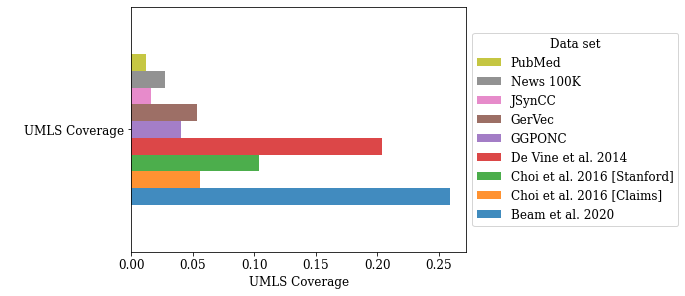

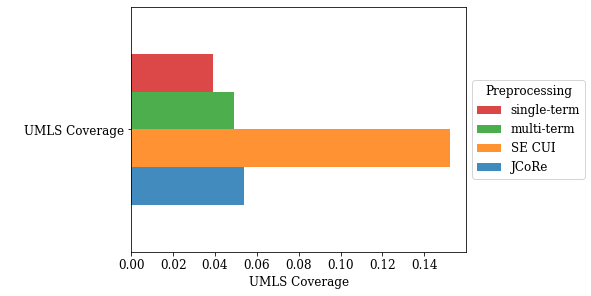

In [15]:
bechmarks_to_plot = ["UMLS Coverage"]

df_coverage = df.loc[df["Algorithm"].isin(["word2vec"])]
df_coverage = df_coverage.loc[df_coverage["Data set"].isin(["GGPONC", "GerVec", "JSynCC", "PubMed", "Choi et al. 2016 [Claims]", "Beam et al. 2020", "De Vine et al. 2014", "News 100K", "Choi et al. 2016 [Stanford]"])]
df_coverage = df_coverage.loc[df_coverage["Preprocessing"].isin(["JCoRe", "UNK"])]

#df_coverage = df
plot_comparison(df_coverage, "Data set", bechmarks_to_plot, papermode=True, title=None, y_label="UMLS Coverage", x_label=" ")
# plot_comparison(df_coverage, "Preprocessing", bechmarks_to_plot, papermode=False)

df_coverage = df.loc[df["Algorithm"].isin(["word2vec"])]
df_coverage = df_coverage.loc[df_coverage["Data set"].isin(["GGPONC", "GerVec", "JSynCC", "PubMed",  "Choi et al. 2016 [Claims]", "Beam et al. 2020", "De Vine et al. 2014", "News 100K",  "Choi et al. 2016 [Stanford]"])]
df_coverage = df_coverage.loc[df_coverage["Preprocessing"].isin(["JCoRe", "UNK"])]

# plot_comparison(df_coverage, "Data set", bechmarks_to_plot, papermode=False, title="Data Set Comparison (word2vec, SE CUI)")
# plot_comparison(df_coverage, "Preprocessing", bechmarks_to_plot, papermode=False)
bechmarks_to_plot = ["UMLS Coverage"]

df_coverage = df.loc[df["Algorithm"].isin(["word2vec"])]
df_coverage = df_coverage.loc[df_coverage["Data set"].isin(["GerVec"])]


#df_coverage = df
plot_comparison(df_coverage, "Preprocessing", bechmarks_to_plot, papermode=False, title=None, y_label="UMLS Coverage", x_label=" ")

# multi-term Comparison: Fig 3

,Data set,Semantic Type,Association,May-(Treat/Prevent),Causality
8,GGPONC,0.083160,0.035963,0.005019,0.002881
20,JSynCC,0.030677,0.002332,0.002105,0.000161
32,PubMed,0.022419,0.001484,0.000971,0.000166
44,GerVec,0.192036,0.048504,0.007447,0.005866
57,News 100K,0.084036,0.006712,0.000000,0.000933


57    News 100K
44       GerVec
32       PubMed
20       JSynCC
8        GGPONC
Name: Data set, dtype: object


Data set,GGPONC,JSynCC,PubMed,GerVec,News 100K
Semantic Type,0.083160,0.030677,0.022419,0.192036,0.084036
Association,0.035963,0.002332,0.001484,0.048504,0.006712
May-(Treat/Prevent),0.005019,0.002105,0.000971,0.007447,0.000000
Causality,0.002881,0.000161,0.000166,0.005866,0.000933


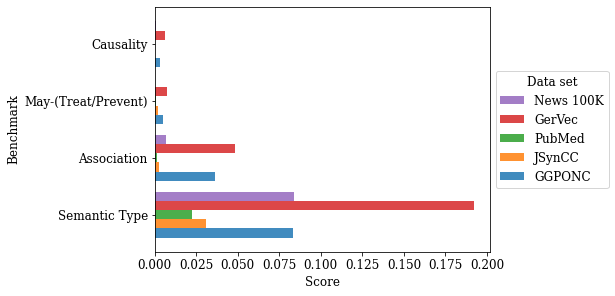

In [30]:
df_d = df.loc[df['Preprocessing']=='SE CUI']
df_d = df_d.loc[df['Algorithm']=='GloVe']
df_d = df_d.loc[df['Data set'].isin(['GGPONC', 'JSynCC', 'PubMed', 'News 100K', 'GerVec'])]
df_d = df_d[['Data set', 'SemanticType (strict)', 'Association (strict)', 'May-(Treat/Prevent) (strict)', 'Causality (strict)']]
df_d.columns = ['Data set', 'Semantic Type', 'Association', 'May-(Treat/Prevent)','Causality']
# benchmarks_to_plot = ['May-(Treat/Prevent)', 'Association', 'SemanticType', 'Causality']
# df_d = df_d.loc[(df['Algorithm']=='Glove') & (df['Preprocessing']=='JCoRe')]
display(df_d)

plot_df(df_d)

# SE CUI Comparison: Fig 4

,Data set,HA MayoSRS (cov.),HA MayoSRS,HA Sim. (cov.),HA Sim.,HA Rel. (cov.),HA Rel.
0,GGPONC,0.227723,0.109019,0.134168,-0.014040,0.124138,0.022268
12,JSynCC,0.108911,0.114156,0.062612,0.287115,0.062069,-0.044015
24,PubMed,0.128713,-0.173554,0.059034,0.060495,0.060345,-0.014566
36,GerVec,0.316832,0.056529,0.234347,0.196184,0.229310,0.102820
49,News 100K,0.049505,0.820783,0.021467,0.216783,0.015517,0.033333


49    News 100K
36       GerVec
24       PubMed
12       JSynCC
0        GGPONC
Name: Data set, dtype: object


Data set,GGPONC,JSynCC,PubMed,GerVec,News 100K
HA MayoSRS (cov.),0.227723,0.108911,0.128713,0.316832,0.049505
HA MayoSRS,0.109019,0.114156,-0.173554,0.056529,0.820783
HA Sim. (cov.),0.134168,0.062612,0.059034,0.234347,0.021467
HA Sim.,-0.014040,0.287115,0.060495,0.196184,0.216783
HA Rel. (cov.),0.124138,0.062069,0.060345,0.229310,0.015517
HA Rel.,0.022268,-0.044015,-0.014566,0.102820,0.033333


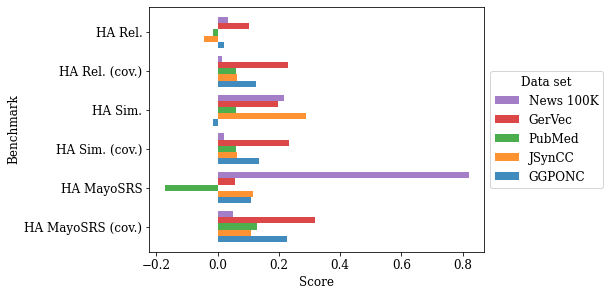

In [66]:
df_d = df.loc[df['Preprocessing']=='multi-term']
df_d = df_d.loc[df['Algorithm']=='word2vec']
df_d = df_d.loc[df['Data set'].isin(['GGPONC', 'JSynCC', 'PubMed', 'News 100K', 'GerVec'])]
df_d = df_d[['Data set', 
             'HumanAssessmentMayoSRS (coverage)', 
             'HumanAssessmentMayoSRS (score)', 
             'HumanAssessmentSimilarityCont (coverage)', 
             'HumanAssessmentSimilarityCont (score)', 
             'HumanAssessmentRelatednessCont (coverage)', 
             'HumanAssessmentRelatednessCont (score)']
           ]
df_d.columns = ['Data set', 
                'HA MayoSRS (cov.)', 
                'HA MayoSRS', 
                'HA Sim. (cov.)', 
                'HA Sim.', 
                'HA Rel. (cov.)', 
                'HA Rel.']
# benchmarks_to_plot = ['HA Rel.', 'HA Rel. (cov.)', 'HA Sim.', 'HA Sim. (cov.)', 'HA MayoSRS', 'HA MayoSRS (cov.)']
# df_d = df_d.loc[(df['Algorithm']=='Glove') & (df['Preprocessing']=='JCoRe')]
display(df_d)

plot_df(df_d)

# Other plots

In [14]:
algorithms = set(df["Algorithm"])
for algorithm in algorithms:
    for benchmark in benchmarks:
        print(f'{algorithm}\t[{benchmark}]\t: {get_avg_gain(df, "Algorithm", "word2vec", benchmark)}')

GloVe	[HumanAssessmentRelatedness (score)]	: (0.19548748455905787, 0.13150648620730715)
GloVe	[ConceptualSimilarityChoi]	: (1.3790453398459963, 0.6934616532416131)


KeyError: 'CausalityBeam 1'

In [79]:
display(df)
df_this = df.loc[df['Preprocessing']=='UNK']
df_this.index
df_rel = df.loc[(df['Algorithm']=='Glove') & (df['Preprocessing']=='JCoRe') & (df['Data set']=='GerVec')]
print(df_this.index)
print(df_rel.index)


,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatednessCont (score),HumanAssessmentRelatednessCont (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
0,GGPONC,multi-term,word2vec,4081,83160,0.049074,0.037825,0.521880,0.022268,0.124138,...,0.109019,0.227723,0.160839,0.000238,0.025126,0.002428,0.078535,0.012446,0.074039,0.004151
1,GGPONC,multi-term,fastText,4081,83160,0.049074,0.037825,1.070278,0.046284,1.000000,...,0.051650,1.000000,0.360140,0.000534,0.056951,0.005504,0.088201,0.013978,0.057341,0.003215
2,GGPONC,multi-term,GloVe,4045,83025,0.048720,0.037491,0.144511,0.048101,0.118966,...,-0.174456,0.217822,0.029851,0.000029,0.081940,0.007933,0.048482,0.007626,0.043731,0.003542
3,GGPONC,single-term,word2vec,3172,117322,0.027037,0.029400,0.341900,0.058434,0.098276,...,-0.094187,0.158416,0.067114,0.000052,0.043062,0.002914,0.085680,0.008308,0.061116,0.002243
4,GGPONC,single-term,fastText,3172,117322,0.027037,0.029400,0.896484,0.054535,1.000000,...,-0.004134,1.000000,0.181208,0.000140,0.086124,0.005828,0.094145,0.009129,0.056785,0.002084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,News 100K,SE CUI,Flair,6292,161331,0.039001,0.058318,1.661099,0.231579,0.034483,...,-0.585779,0.089109,0.121317,0.000363,0.000000,0.000000,0.080873,0.020524,0.057971,0.001554
73,News 100K,SE CUI NF,Flair,6292,161331,0.039001,0.058318,2.636681,0.478195,0.034483,...,-0.200839,0.089109,0.419411,0.001254,0.086957,0.000324,0.134730,0.034192,0.074440,0.001996
74,News 100K,JCoRe,Flair,3087,189671,0.016276,0.028612,0.198982,-0.269231,0.043103,...,-0.400000,0.039604,0.145038,0.000197,0.064516,0.000324,0.075020,0.001295,0.077640,0.000883
75,News 100K,multi-term,Flair,0,155039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Int64Index([63, 64, 65, 66], dtype='int64')
Int64Index([], dtype='int64')


,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatedness (score),HumanAssessmentRelatedness (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
44,GerVec,SE CUI,GloVe,16440,121007,0.135860,0.152375,0.004548,-0.172368,0.158416,...,-0.192153,0.072848,0.401703,0.005866,0.040529,0.007447,0.233116,0.192036,0.321772,0.048504
63,Choi et al. 2016 [Stanford],UNK,word2vec,11229,22705,0.494561,0.104076,3.846879,0.646394,0.722772,...,0.439967,0.893502,0.264737,0.002607,0.375834,0.237247,0.085499,0.075808,0.137449,0.038224
64,Choi et al. 2016 [Claims],UNK,word2vec,6019,14852,0.405265,0.055787,5.281200,0.840366,0.090000,...,0.385299,0.441805,0.210526,0.000332,0.417681,0.105570,0.159455,0.135610,0.256581,0.017045
65,De Vine et al. 2014,UNK,word2vec,21992,52102,0.422095,0.203833,2.662334,0.603733,0.891089,...,0.414807,0.802974,0.075709,0.007182,0.060203,0.043232,0.087898,0.078206,0.025339,0.007754
66,Beam et al. 2020,UNK,word2vec,27994,109053,0.256701,0.259463,5.803667,0.621958,0.900990,...,0.427490,0.915771,0.424186,0.055130,0.643482,0.512389,0.186174,0.171044,0.298318,0.108100


C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


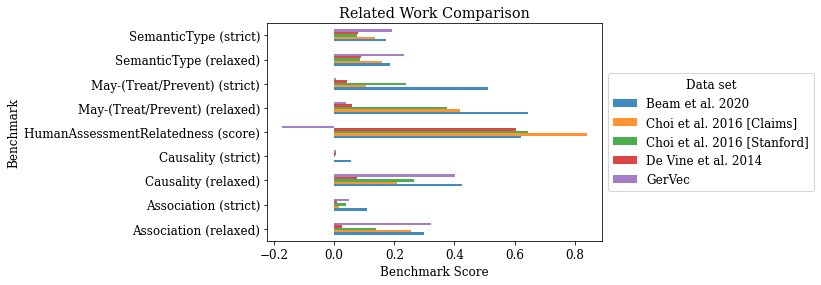

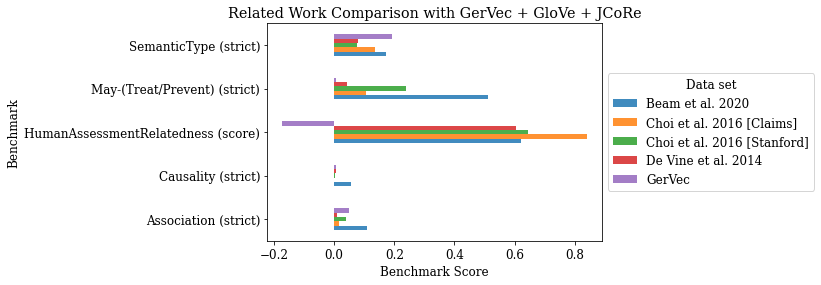

In [16]:

df_rw = df.loc[[44, 63, 64,65,66]]
display(df_rw)
# bechmarks_to_plot = ["HumanAssessment", 
#                      "CausalityBeam 1", "CausalityBeam 2", 
#                      "NDFRTBeam 1", "NDFRTBeam 2", 
#                      "SemanticTypeBeam 1", "SemanticTypeBeam 2",
#                      "AssociationBeam 1", "AssociationBeam 2"]

bechmarks_to_plot = ["HumanAssessmentRelatedness (score)", 
                     "Causality (relaxed)", "Causality (strict)", 
                     "May-(Treat/Prevent) (relaxed)", "May-(Treat/Prevent) (strict)", 
                     "SemanticType (relaxed)", "SemanticType (strict)",
                     "Association (relaxed)", "Association (strict)"]


plot_comparison(df_rw, "Data set", bechmarks_to_plot, papermode=False, title="Related Work Comparison", x_lim=False)

# bechmarks_to_plot = ["HumanAssessmentRelatedness (score)", "CausalityBeam 2", "NDFRTBeam 2", "SemanticTypeBeam 2", "AssociationBeam 2"]
bechmarks_to_plot = ["HumanAssessmentRelatedness (score)", "Causality (strict)", "May-(Treat/Prevent) (strict)", "SemanticType (strict)", "Association (strict)"]

plot_comparison(df_rw, "Data set", bechmarks_to_plot, papermode=False, title="Related Work Comparison with GerVec + GloVe + JCoRe", x_lim=False)

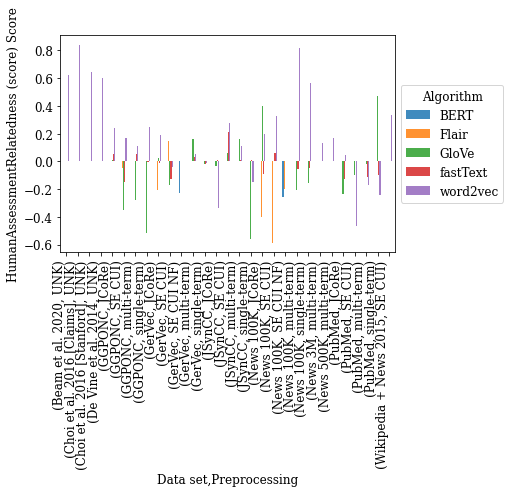

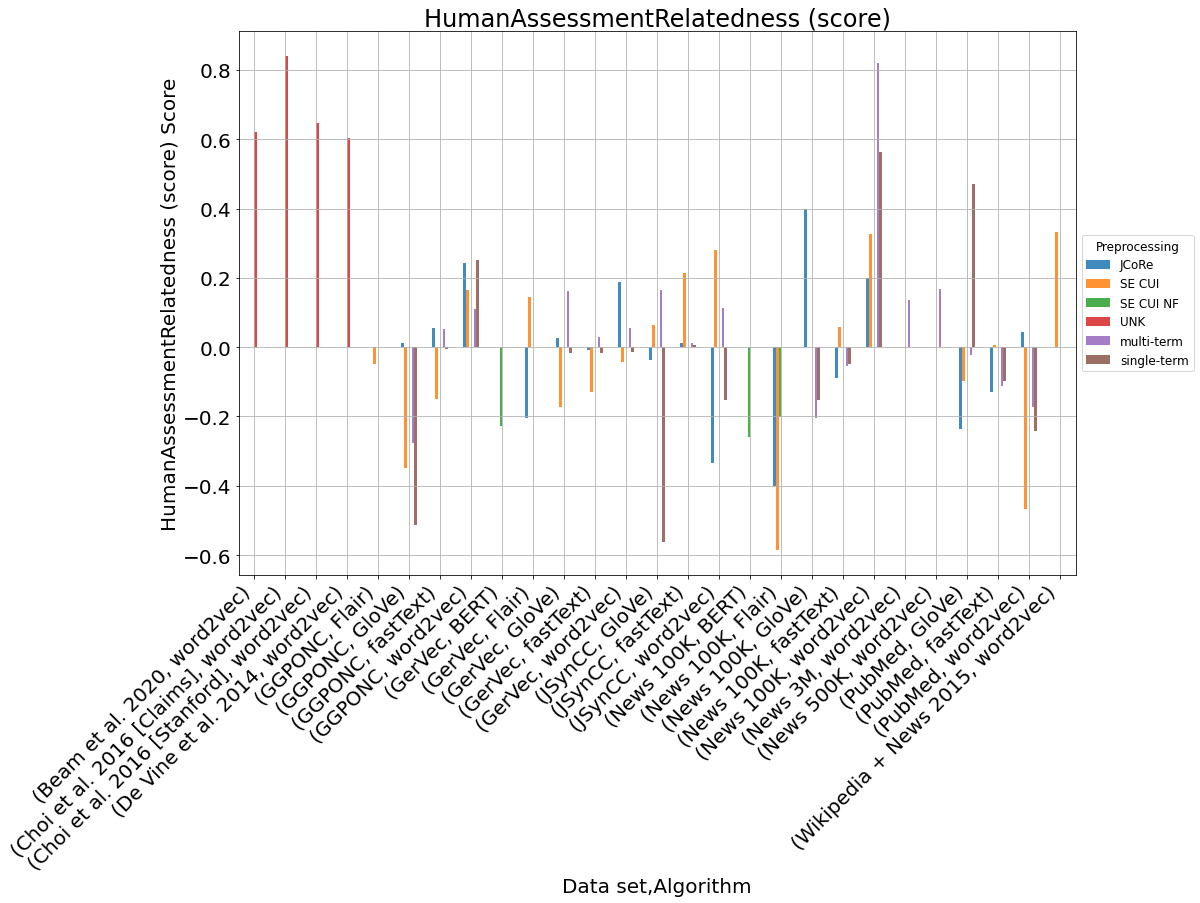

In [12]:
plot_single_benchmark(df, benchmark="HumanAssessmentRelatedness (score)", grouping=["Data set", "Preprocessing", "Algorithm"], coloring="Algorithm", paper_mode=True)
plot_single_benchmark(df, benchmark="HumanAssessmentRelatedness (score)", grouping=["Data set", "Algorithm"], coloring="Preprocessing", paper_mode=False)
# plot_single_benchmark(df, benchmark="CategoryBenchmark", grouping="Algorithm", coloring="Data set", paper_mode=False)

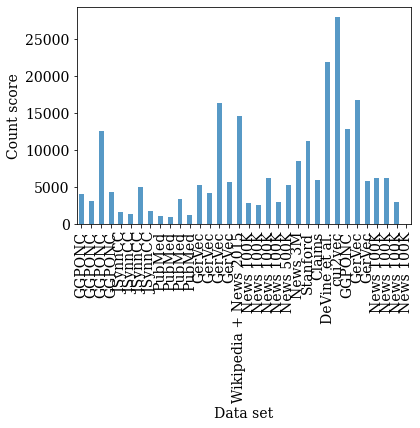

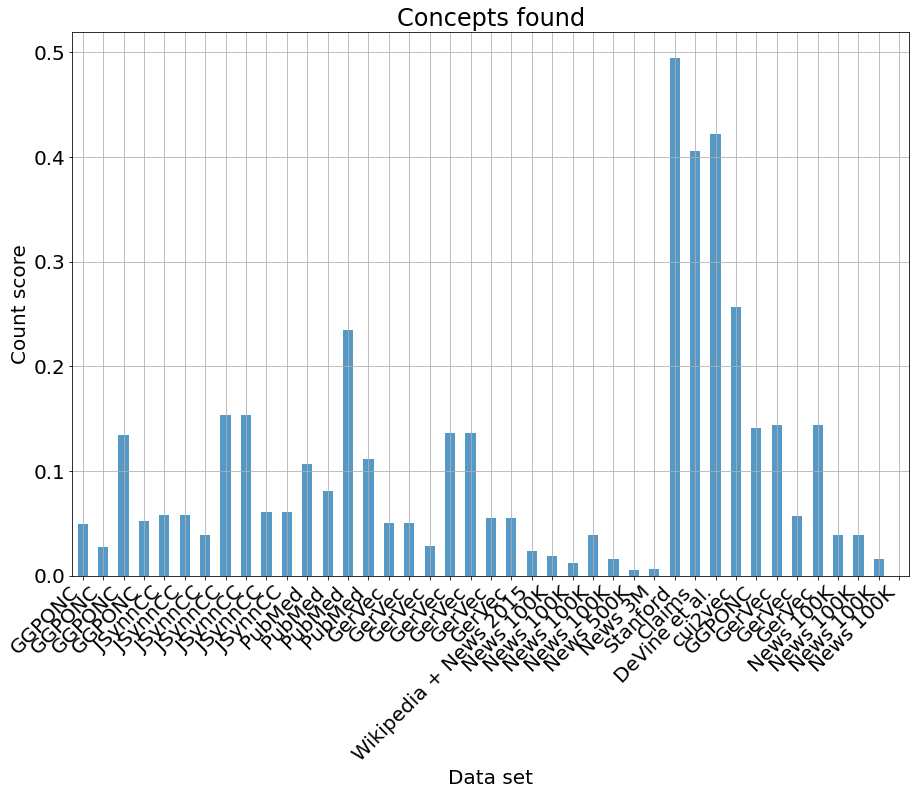

In [70]:
plot_counts(df, x_attribute="Data set", grouping ="", coloring=["# Concepts"], paper_mode=True)
plot_counts(df, x_attribute="Data set", grouping ="", coloring=["CUI Coverage"], paper_mode=False)

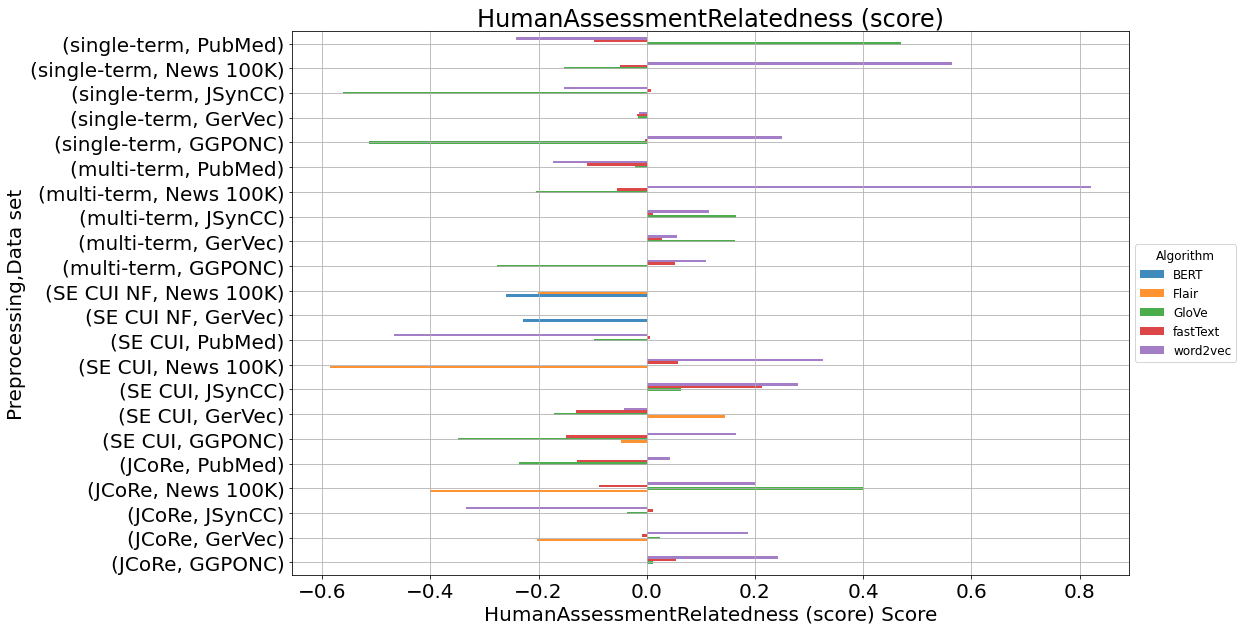

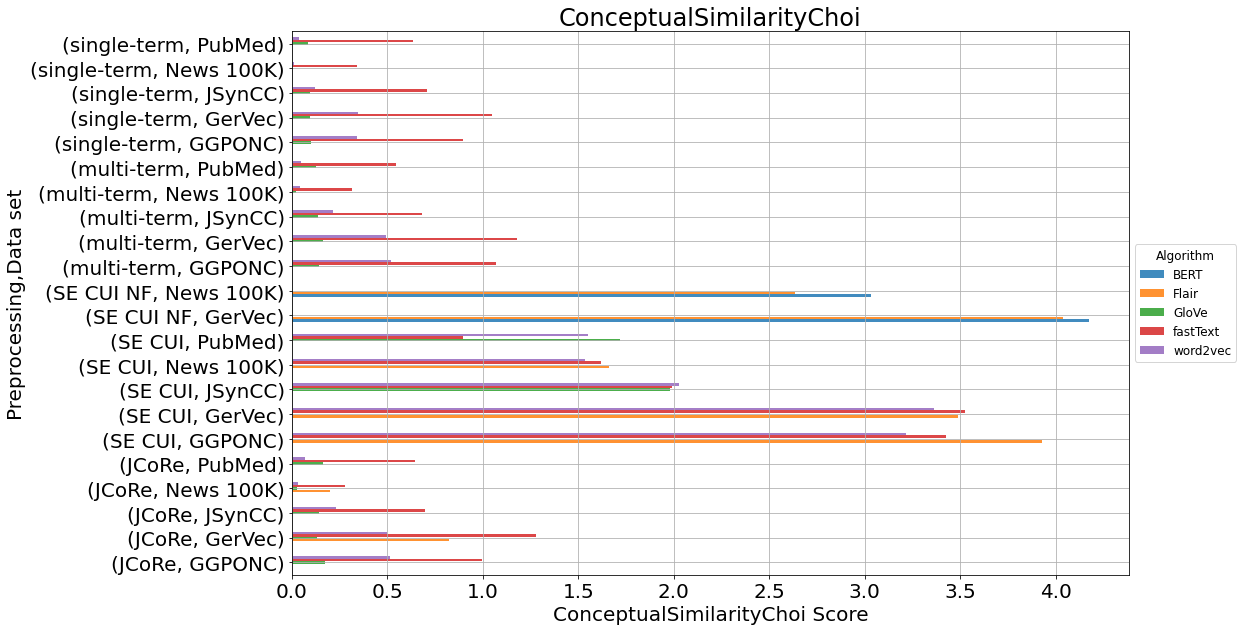

KeyError: "['CausalityBeam 1'] not in index"

In [13]:
attributes = ["Algorithm", "Preprocessing", "Data set",]
benchmarks = ["HumanAssessmentRelatedness (score)", "ConceptualSimilarityChoi",
              "CausalityBeam 1", "CausalityBeam 2",
              "NDFRTBeam 1", "NDFRTBeam 2", 
              "SemanticTypeBeam 1", "SemanticTypeBeam 2",  
              "AssociationBeam 1", "AssociationBeam 2"]
datasets = ["News 100K", "PubMed", "GerVec", "GGPONC", "JSynCC"]

df_filtered = df.loc[df['Data set'].isin(datasets)]
# for benchmark in benchmarks:
#     plot_single_benchmark(df, benchmark=benchmark, grouping=["Data set", "Preprocessing"], coloring="Algorithm", paper_mode=False)
#     plot_single_benchmark(df, benchmark=benchmark, grouping=["Data set", "Algorithm"], coloring="Preprocessing", paper_mode=False)
#     plot_single_benchmark(df, benchmark=benchmark, grouping=["Algorithm", "Preprocessing"], coloring="Data set", paper_mode=False)

for i, attribute in enumerate(attributes):
    coloring = attributes[i]
    grouping = [attribute for attribute in attributes if attribute !=coloring]
    
    for benchmark in benchmarks:
         plot_single_benchmark(df_filtered, benchmark=benchmark, grouping=grouping, coloring=coloring, paper_mode=False, horizontal=True)

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatednessCont (score),HumanAssessmentRelatednessCont (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
0,GGPONC,multi-term,word2vec,4081,83160,0.049074,0.037825,0.521880,0.022268,0.124138,...,0.109019,0.227723,0.160839,0.000238,0.025126,0.002428,0.078535,0.012446,0.074039,0.004151
1,GGPONC,multi-term,fastText,4081,83160,0.049074,0.037825,1.070278,0.046284,1.000000,...,0.051650,1.000000,0.360140,0.000534,0.056951,0.005504,0.088201,0.013978,0.057341,0.003215
2,GGPONC,multi-term,GloVe,4045,83025,0.048720,0.037491,0.144511,0.048101,0.118966,...,-0.174456,0.217822,0.029851,0.000029,0.081940,0.007933,0.048482,0.007626,0.043731,0.003542
3,GGPONC,single-term,word2vec,3172,117322,0.027037,0.029400,0.341900,0.058434,0.098276,...,-0.094187,0.158416,0.067114,0.000052,0.043062,0.002914,0.085680,0.008308,0.061116,0.002243
4,GGPONC,single-term,fastText,3172,117322,0.027037,0.029400,0.896484,0.054535,1.000000,...,-0.004134,1.000000,0.181208,0.000140,0.086124,0.005828,0.094145,0.009129,0.056785,0.002084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,News 100K,SE CUI,Flair,6292,161331,0.039001,0.058318,1.661099,0.231579,0.034483,...,-0.585779,0.089109,0.121317,0.000363,0.000000,0.000000,0.080873,0.020524,0.057971,0.001554
73,News 100K,SE CUI NF,Flair,6292,161331,0.039001,0.058318,2.636681,0.478195,0.034483,...,-0.200839,0.089109,0.419411,0.001254,0.086957,0.000324,0.134730,0.034192,0.074440,0.001996
74,News 100K,JCoRe,Flair,3087,189671,0.016276,0.028612,0.198982,-0.269231,0.043103,...,-0.400000,0.039604,0.145038,0.000197,0.064516,0.000324,0.075020,0.001295,0.077640,0.000883
75,News 100K,multi-term,Flair,0,155039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


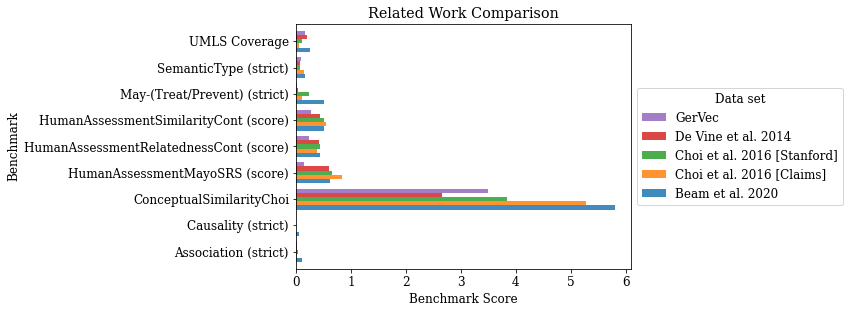

In [77]:
display(df)
plot_comparison(df.loc[[68, 63, 64,65,66]], "Data set", bechmarks_to_plot, papermode=False, title="Related Work Comparison")

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatedness (score),HumanAssessmentRelatedness (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
67,GGPONC,SE CUI,Flair,12877,91497,0.140737,0.119351,3.928425,-0.048402,0.356436,...,0.025881,0.199519,0.198925,0.001534,0.084906,0.011656,0.125321,0.099579,0.074165,0.009097
68,GerVec,SE CUI,Flair,16850,117302,0.143646,0.156175,3.486344,0.143985,0.475248,...,0.232013,0.334802,0.289520,0.004280,0.047038,0.008742,0.105891,0.087714,0.074202,0.011746
69,GerVec,SE CUI NF,Flair,16850,117302,0.143646,0.156175,4.038570,-0.000109,0.475248,...,0.066171,0.334802,0.221521,0.003275,0.081010,0.015056,0.125893,0.104282,0.065722,0.010404
70,GerVec,JCoRe,Flair,5803,101896,0.056950,0.053785,0.825192,-0.203733,0.350000,...,0.012505,0.389868,0.041916,0.000145,0.056436,0.009228,0.061997,0.020383,0.066607,0.006571
71,GerVec,SE CUI NF,BERT,16850,117288,0.143663,0.156175,4.173815,-0.228848,0.475248,...,0.113173,0.334802,0.343498,0.005078,0.004355,0.000809,0.109698,0.090867,0.024213,0.003833
72,News 100K,SE CUI,Flair,6292,161331,0.039001,0.058318,1.661099,-0.585779,0.090909,...,0.231579,0.055866,0.121317,0.000363,0.000000,0.000000,0.080873,0.020524,0.057971,0.001554
73,News 100K,SE CUI NF,Flair,6292,161331,0.039001,0.058318,2.636681,-0.200839,0.090909,...,0.478195,0.055866,0.419411,0.001254,0.086957,0.000324,0.134730,0.034192,0.074440,0.001996
74,News 100K,JCoRe,Flair,3087,189671,0.016276,0.028612,0.198982,-0.400000,0.041237,...,-0.269231,0.072254,0.145038,0.000197,0.064516,0.000324,0.075020,0.001295,0.077640,0.000883
75,News 100K,multi-term,Flair,0,155039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
76,News 100K,SE CUI NF,BERT,6290,161258,0.039006,0.058299,3.034500,-0.259416,0.090909,...,0.362406,0.055866,0.414211,0.001238,0.000000,0.000000,0.152385,0.038673,0.045455,0.001219


C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


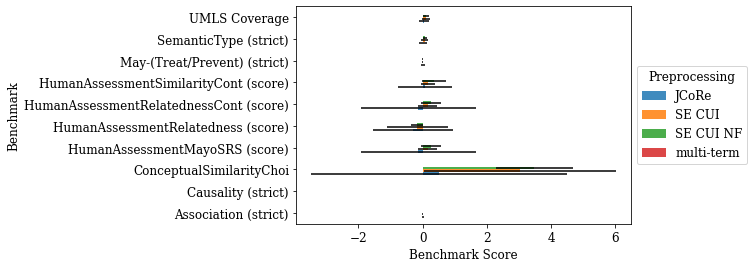

In [18]:
df_flair = df.loc[df['Algorithm'].isin(["Flair", "BERT"])]
# df_this.index
# df_rel = df.loc[(df['Algorithm']=='Glove') & (df['Preprocessing']=='JULIE') & (df['Data set']=='GerVec')]
# print(df_rel.index)
# print(df_this.index)
display(df_flair)
plot_comparison(df_flair, "Preprocessing", bechmarks_to_plot, papermode=False, x_lim=False)

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatedness (score),HumanAssessmentRelatedness (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
0,GGPONC,multi-term,word2vec,4081,83160,0.049074,0.037825,0.521880,0.109019,0.227723,...,0.022268,0.177778,0.160839,0.000238,0.025126,0.002428,0.078535,0.012446,0.074039,0.004151
1,GGPONC,multi-term,fastText,4081,83160,0.049074,0.037825,1.070278,0.051650,1.000000,...,0.046284,1.000000,0.360140,0.000534,0.056951,0.005504,0.088201,0.013978,0.057341,0.003215
2,GGPONC,multi-term,GloVe,4045,83025,0.048720,0.037491,0.144511,-0.277543,0.217822,...,0.044191,0.170370,0.029851,0.000029,0.081940,0.007933,0.048482,0.007626,0.043731,0.003542
3,GGPONC,single-term,word2vec,3172,117322,0.027037,0.029400,0.341900,0.250184,0.158416,...,0.137317,0.148825,0.067114,0.000052,0.043062,0.002914,0.085680,0.008308,0.061116,0.002243
4,GGPONC,single-term,fastText,3172,117322,0.027037,0.029400,0.896484,-0.004134,1.000000,...,0.054535,1.000000,0.181208,0.000140,0.086124,0.005828,0.094145,0.009129,0.056785,0.002084
5,GGPONC,single-term,GloVe,3172,117322,0.027037,0.029400,0.099176,-0.513613,0.158416,...,0.141790,0.148825,0.068966,0.000029,0.078947,0.005342,0.066730,0.006471,0.044401,0.002229
6,GGPONC,SE CUI,word2vec,12612,93879,0.134343,0.116895,3.218167,0.165343,0.346535,...,0.185502,0.197590,0.092033,0.000694,0.081243,0.011009,0.119662,0.094690,0.065189,0.007949
7,GGPONC,SE CUI,fastText,12612,93879,0.134343,0.116895,3.427386,-0.148651,1.000000,...,0.020529,1.000000,0.197802,0.001492,0.054958,0.007447,0.139631,0.110492,0.053165,0.006482
8,GGPONC,SE CUI,GloVe,12612,93879,0.134343,0.116895,0.003291,-0.348227,0.128713,...,-0.150691,0.050602,0.381868,0.002881,0.037037,0.005019,0.105091,0.083160,0.294944,0.035963
9,GGPONC,JCoRe,word2vec,4342,83155,0.052216,0.040244,0.513450,0.242549,0.220000,...,0.082455,0.234450,0.161290,0.000285,0.040788,0.004695,0.089385,0.017421,0.061351,0.003833


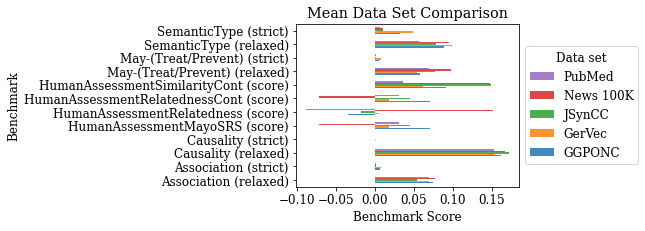

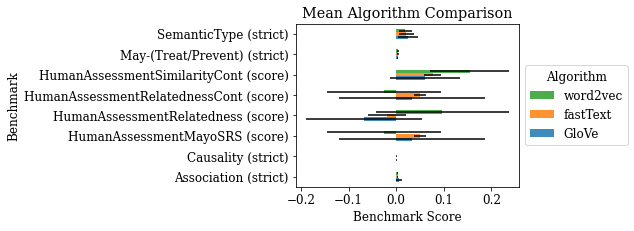

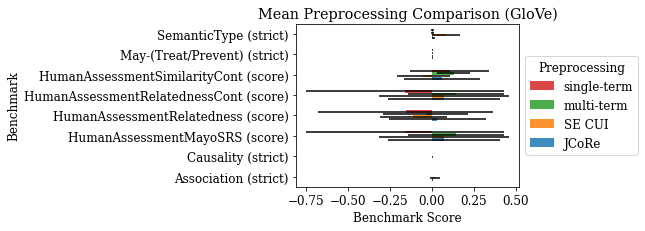

C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Nutzer\anaconda3\envs\AML4DHGermanVecs\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


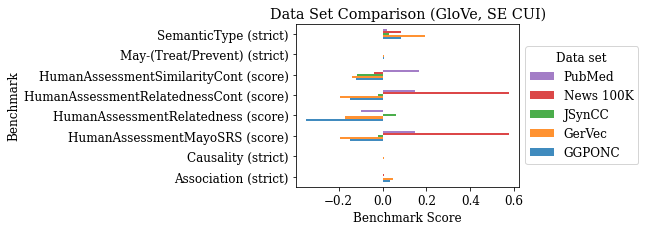

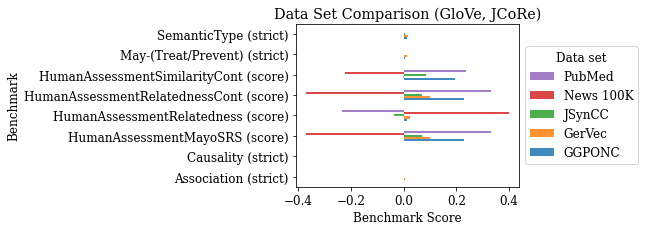

In [135]:
df_pf = df.loc[df['Algorithm'].isin(["word2vec", "GloVe", "fastText"])]
df_pf = df_pf.loc[df_pf['Preprocessing'].isin(["JCoRe", "SE CUI", "single-term", "multi-term"])]
df_pf = df_pf.loc[df_pf['Data set'].isin(["GGPONC", "News 100K", "JSynCC", "PubMed", "GerVec"])]
display(df_pf)
# bechmarks_to_plot = ["HumanAssessment", 
#                      "CausalityBeam (relaxed)", "CausalityBeam (strict)", 
#                      "NDFRTBeam (relaxed)", "NDFRTBeam (strict)", 
#                      "SemanticTypeBeam (relaxed)", "SemanticTypeBeam (strict)",
#                      "AssociationBeam (relaxed)", "AssociationBeam (strict)"]
bechmarks_to_plot = ["HumanAssessmentRelatedness (score)", "HumanAssessmentRelatednessCont (score)",
                     "HumanAssessmentSimilarityCont (score)","HumanAssessmentMayoSRS (score)", 
                     "Causality (relaxed)", "Causality (strict)", 
                     "May-(Treat/Prevent) (relaxed)", "May-(Treat/Prevent) (strict)", 
                     "SemanticType (relaxed)", "SemanticType (strict)",
                     "Association (relaxed)", "Association (strict)"]

datasets = ["News 100K", "PubMed", "GerVec", "GGPONC", "JSynCC"]
df_filtered = df_pf.loc[df_pf['Data set'].isin(datasets)]

plot_comparison(df_filtered, "Data set", bechmarks_to_plot, papermode=False, error_bar=False, title="Mean Data Set Comparison", x_lim=False)
bechmarks_to_plot = ["HumanAssessmentRelatedness (score)", "HumanAssessmentRelatednessCont (score)",
                     "HumanAssessmentSimilarityCont (score)","HumanAssessmentMayoSRS (score)", 
                     "Causality (strict)", "May-(Treat/Prevent) (strict)", 
                     "SemanticType (strict)", "Association (strict)"]
plot_comparison(df_filtered, "Algorithm", bechmarks_to_plot, papermode=False, title="Mean Algorithm Comparison", x_lim=False)
df_glove_filtered = df_filtered.loc[df_filtered['Algorithm'].isin(["GloVe"])]
plot_comparison(df_glove_filtered, "Preprocessing", bechmarks_to_plot, papermode=False, title="Mean Preprocessing Comparison (GloVe)", x_lim=False)
df_glove_filtered_se_cui = df_glove_filtered.loc[df['Preprocessing'].isin(["SE CUI"])]
plot_comparison(df_glove_filtered_se_cui, "Data set", bechmarks_to_plot, papermode=False, title="Data Set Comparison (GloVe, SE CUI)", x_lim=False)
df_glove_filtered_JULIE = df_glove_filtered.loc[df['Preprocessing'].isin(["JCoRe"])]
plot_comparison(df_glove_filtered_JULIE, "Data set", bechmarks_to_plot, papermode=False, title="Data Set Comparison (GloVe, JCoRe)", x_lim=False)


In [78]:
#67, 70
df_rw = df.loc[[69, 63, 64,65,66]]
display(df_rw)
bechmarks_to_plot = ["HumanAssessment", "Causality (strict)", "May-(Treat/Prevent) (strict)", "SemanticType (strict)", "Association (strict)"]

plot_comparison(df.loc[[69, 63, 64,65,66]], "Data set", bechmarks_to_plot, papermode=False, title="Related Work Comparison with GerVec + Flair + JCoRe", x_lim=False)

,Data set,Preprocessing,Algorithm,# Concepts,# Words,CUI Coverage,UMLS Coverage,ConceptualSimilarityChoi,HumanAssessmentRelatednessCont (score),HumanAssessmentRelatednessCont (coverage),...,HumanAssessmentMayoSRS (score),HumanAssessmentMayoSRS (coverage),Causality (relaxed),Causality (strict),May-(Treat/Prevent) (relaxed),May-(Treat/Prevent) (strict),SemanticType (relaxed),SemanticType (strict),Association (relaxed),Association (strict)
69,GerVec,SE CUI NF,Flair,16850,117302,0.143646,0.156175,4.038570,0.066171,0.262069,...,-0.000109,0.475248,0.221521,0.003275,0.081010,0.015056,0.125893,0.104282,0.065722,0.010404
63,Choi et al. 2016 [Stanford],UNK,word2vec,11229,22705,0.494561,0.104076,3.846879,0.439967,0.853448,...,0.646394,0.722772,0.264737,0.002607,0.375834,0.237247,0.085499,0.075808,0.137449,0.038224
64,Choi et al. 2016 [Claims],UNK,word2vec,6019,14852,0.405265,0.055787,5.281200,0.385299,0.320690,...,0.840366,0.089109,0.210526,0.000332,0.417681,0.105570,0.159455,0.135610,0.256581,0.017045
65,De Vine et al. 2014,UNK,word2vec,21992,52102,0.422095,0.203833,2.662334,0.414807,0.744828,...,0.603733,0.891089,0.075709,0.007182,0.060203,0.043232,0.087898,0.078206,0.025339,0.007754
66,Beam et al. 2020,UNK,word2vec,27994,109053,0.256701,0.259463,5.803667,0.427490,0.881034,...,0.621958,0.900990,0.424186,0.055130,0.643482,0.512389,0.186174,0.171044,0.298318,0.108100


KeyError: 'HumanAssessment'